### <strong><font color=cornflowerblue>第四次作品：以蒙地卡羅實驗驗證 J-B 檢定統計量的卡方分配與檢定力的表現</font></strong>
學號：411078064

姓名：謝意盛
<hr>

### <strong><font color=lightseagreen>作品目標</font></strong>：

本作品通過蒙地卡羅實驗（Monte Carlo Simulation）驗證以 Skewness 為基礎的 $G_1$ 統計量（$G_1 = \sqrt{\frac{n}{6}}\hat{s} $），以 Kurtosis 為基礎的 $G_2$ 統計量（$ G_2 = \sqrt{\frac{n}{24}}(\hat{k} - 3) $）是否依據理論上服從標準常態 N(0, 1)，以及由兩者結合形成的 $G_3$ 統計量（$ G_3 = G_1^2 + G_2^2 = \frac{n}{6}\big(\hat{s}^2 + \frac{(\hat{k} - 3)^2}{4}\big) $）是否依據理論上服從卡方 $\chi^2(2)$，其中 $G_3$ 統計量為著名的 J-B (Jarque-Bera) 常態檢定統計量。
此外，繼續通過蒙地卡羅實驗來驗證 $G_3$ 統計量的檢定力（Power），以及與其他著名的常態檢定之產品進行比較，如 `scipy.stats` 裡的 Jarque–Bera Test (jarque_bera)、D’Agostino and Pearson’s (normaltest)、Kolmogorov-Smirnov Test (kstest)、Shapiro-Wilk Test (shapiro)、Anderson-Darling Test (anderson)、Cramér-von Mises Test(cramervonmises) 以及 `statsmodels.stats.diagnostic` 裡的 Lilliefors Test (lilliefors)，觀察它們在不同分佈、樣本數下檢定力之間的差異。


<hr>

### <strong><font color=cornflowerblue>目標一</font></strong>：通過蒙地卡羅實驗來驗證以 Skewness 為基礎的 $G_1$ 統計量，以 Kurtosis 為基礎的 $G_2$ 統計量是否服從標準常態 N(0, 1)，以及由兩者結合形成的 $G_3$ 統計量是否服從卡方 $\chi^2(2)$。

- 檢定統計量 $G_1$：
$$ G_1 = \sqrt{\frac{n}{6}}\hat{s} $$
其中 $\hat{s}$ 為偏態係數 Skewness 的估計值。

- 檢定統計量 $G_2$：
$$ G_2 = \sqrt{\frac{n}{24}}(\hat{k} - 3) $$
其中 $\hat{k}$ 為峰態係數 Kurtosis 的估計值。

- 檢定統計量 $G_3$：
$$ G_3 = G_1^2 + G_2^2 = \frac{n}{6}\bigg(\hat{s}^2 + \frac{(\hat{k} - 3)^2}{4}\bigg) $$
其中 $\hat{s}$ 為偏態係數 skewness 的估計值，$\hat{k}$ 為峰態係數 Kurtosis 的估計值。

#### **<font color=indianred>說明</font>**：生成 n 個來自標準常態 N(0, 1) 的隨機樣本，其中樣本數 n = 10，20，30，50，100，300，500，1000，2000。針對每個樣本數 n 進行 N = 50000 次的蒙地卡羅模擬實驗，計算出 $G_1$ 估計值，並繪製出每個樣本數 n 的 $G_1$ 估計值分佈的直方圖以及 Empirical CDF，且分別畫上對應的標準常態 PDF 與 CDF 圖，觀察由 $G_1$ 統計量生成的估計值與真實標準常態分佈的分佈情況之間的關聯性。

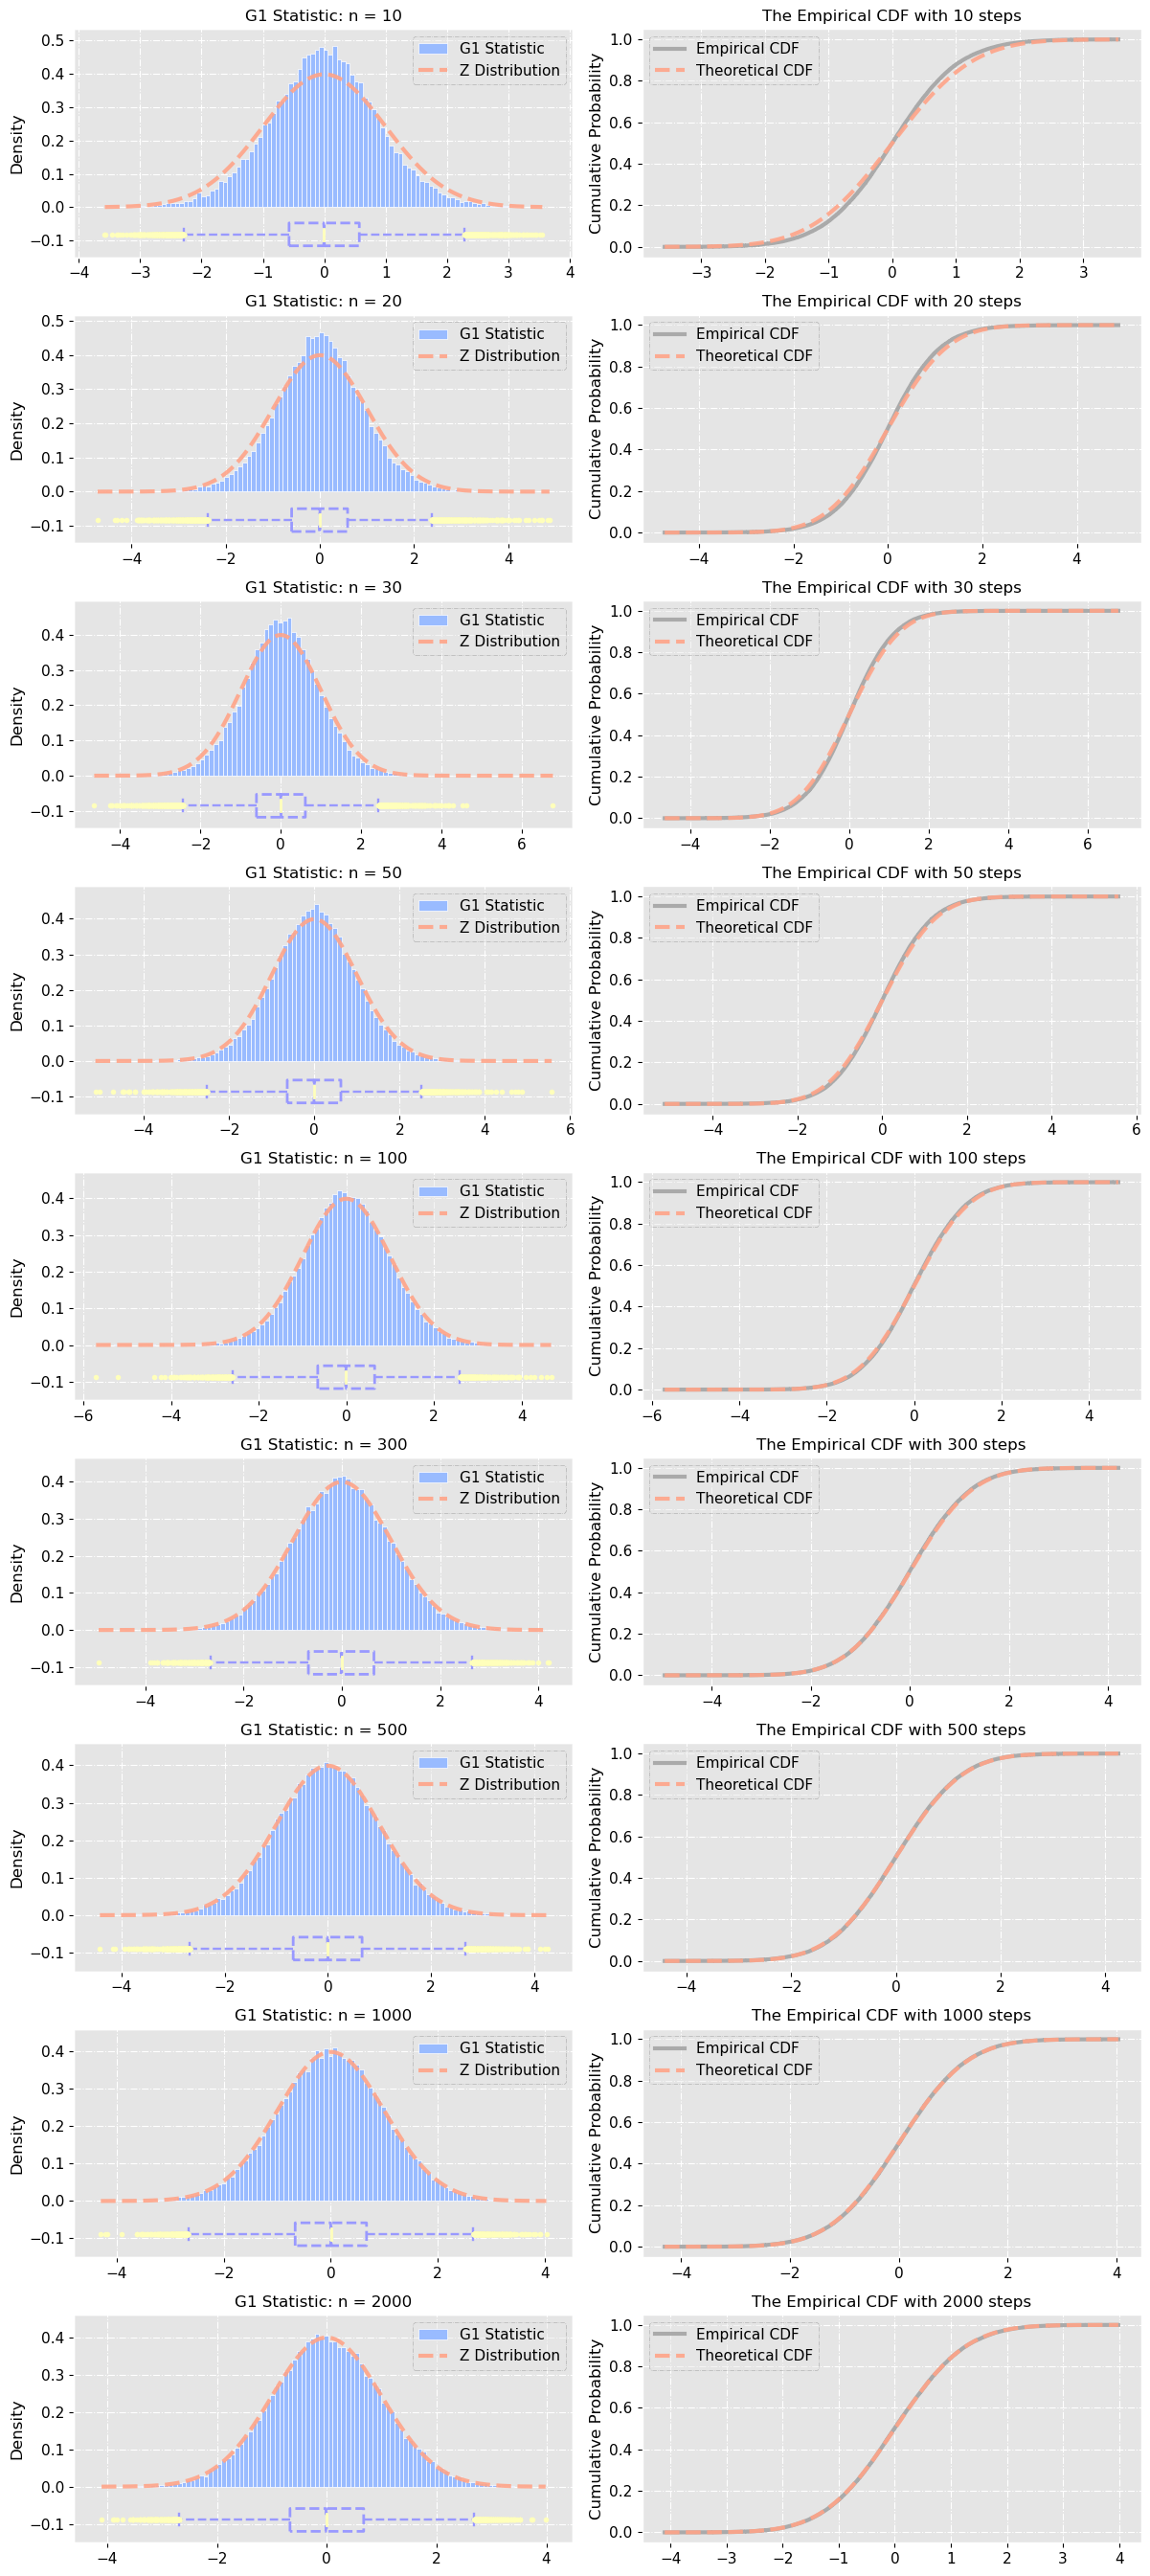

In [308]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import cumfreq, skew
from scipy.stats import norm

# 抽樣次數
N = 50000
# 樣本數
n_val = [10, 20, 30, 50, 100, 300, 500, 1000, 2000]
G1 = np.zeros((N, len(n_val)))

# 繪圖
plt.style.use('ggplot')
fig, axs = plt.subplots(9, 2, figsize = (12, 27))

for i, n in enumerate(n_val):
    # 生成 N rows n columns 服從標準常態分佈的樣本 for skewness
    x = norm.rvs(0, 1, (N, n))
    # 生成 G1 统计量
    G1 = np.sqrt(n / 6) * skew(x, axis = 1, bias = False) # compute skewness for each row

    # normal PDF
    x_pdf = np.linspace(min(G1), max(G1), 1000)
    y_pdf = norm.pdf(x_pdf, 0, 1)

    # 計算 G1 的 ECDF
    res = cumfreq(G1, numbins = N)
    ecdf_x = res.lowerlimit + np.linspace(0, res.binsize * res.cumcount.size, res.cumcount.size)
    cumcountprob = res.cumcount / N  # 累積次數除以總樣本數量 = 累積機率

    # normal CDF
    x_cdf = np.linspace(ecdf_x.min(), ecdf_x.max(), 1000)
    y_cdf = norm.cdf(x_cdf, 0, 1)

    # 設定子圖
    ax_pdf = axs[i, 0]
    ax_cdf = axs[i, 1]

    # G1 统计量的直方图與 normal PDF
    his = ax_pdf.hist(G1, bins = 100, density = True, color = '#99BBFF', edgecolor = '#FFFFFF'
                , label = 'G1 Statistic')
    ax_pdf.plot(x_pdf, y_pdf, color = '#FFA488', lw = 3, linestyle = '--', label = 'Z Distribution'
                , alpha = 0.9)
    ax_pdf.set_title('G1 Statistic: n = {}'.format(n), fontsize = 12)
    ax_pdf.set_ylabel('Density', fontsize = 12, color = 'black')
    legend0 = ax_pdf.legend(edgecolor = '#666666', prop = {'size': 11})
    legend0.get_frame().set_linestyle('-.')
    legend0.get_frame().set_alpha(0.4)
    ax_pdf.grid(True, linestyle = '-.')
    ax_pdf.tick_params(axis = 'both', labelsize = 11, colors = 'black')
    counts = his[0]
    ax_pdf.set_xlim([x_pdf.min() - 0.5, x_pdf.max() + 0.5])
    ax_pdf.set_ylim(-0.15, counts.max() + 0.05)

    # G1 统计量的盒鬚圖
    boxprops = dict(linestyle = '--', linewidth = 2, color = '#9999FF')
    whiskerprops = dict(color = '#9999FF', linewidth = 1.7, linestyle = '--')
    capprops = dict(color = '#9999FF', linewidth = 1.7)
    flierprops = dict(marker = 'o', markerfacecolor = '#FFFFBB', markersize = 4
                    , linestyle = 'none', markeredgecolor = 'none')   # define outliers
    medianprops = dict(color = '#FFFFBB', linewidth = 2, linestyle = '-')  # 设置中位数线的样式
    ax_box = ax_pdf.twinx()  # 使用 twinx 創建共享 x 軸的第二個 y 軸
    ax_box.boxplot(G1, vert = False, notch = True, boxprops = boxprops, flierprops = flierprops, whiskerprops = whiskerprops
                   , capprops = capprops, medianprops = medianprops, positions = [-0.12], widths = 0.03)
    ax_box.set_yticks([])  # 移除 y 軸刻度
    ax_box.set_ylim(-0.15, 0.15)  # 設置 y 軸範圍以顯示盒鬚圖

    # G1 统计量的 ECDF 與 normal CDF
    ax_cdf.plot(ecdf_x, cumcountprob, drawstyle = 'steps-pre', label = 'Empirical CDF'
                , color = '#AAAAAA', lw = 3)
    ax_cdf.plot(x_cdf, y_cdf, color = '#FFA488', label = 'Theoretical CDF', alpha = 0.9, lw = 3
                , linestyle = '--')
    ax_cdf.set_title('The Empirical CDF with {} steps'.format(n), fontsize = 12)
    ax_cdf.set_ylabel('Cumulative Probability', fontsize = 12, color = 'black')
    legend1 = ax_cdf.legend(edgecolor = '#666666', prop = {'size': 11})
    legend1.get_frame().set_linestyle('-.')
    legend1.get_frame().set_alpha(0.4)
    ax_cdf.grid(True, linestyle = '-.')
    ax_cdf.tick_params(axis = 'both', labelsize = 11, colors = 'black')

plt.tight_layout()
plt.show()

##### **<font color=cornflowerblue>注意事項與討論：</font>**

**<font color=lightseagreen>觀察</font>**：

- 當樣本數 n 較小時，$G_1$ 統計量的分佈與標準常態分佈有較大的偏差。這可能是由於樣本數較小時，估計值的變異較大，導致分佈不穩定。

- 隨著樣本數 n 的增加，$G_1$ 統計量的分佈逐漸趨近於標準常態分佈。當樣本數 n 增加到 300 或以上時，$G_1$ 統計量的分佈與標準常態分佈幾乎相同。

- 在樣本數較大的情況下，$G_1$ 統計量的分佈與標準常態分佈幾乎完全重合，這表明 $G_1$ 統計量在大樣本的情況下會無限趨近於標準常態分佈。

- Empirical CDF 與標準常態 CDF 的對比圖顯示，隨著樣本數的增加，Empirical CDF 與標準常態 CDF 越來越接近，這進一步證明了 $G_1$ 統計量在大樣本的情況下會無限趨近於標準常態分佈。

- 盒鬚圖顯示，當樣本數較小時，分佈範圍較廣且包含較多的異常值；而隨著樣本數的增加，分佈範圍逐漸收窄，異常值的數量顯著減少，顯示出分佈的集中趨勢。

**<font color=lightseagreen>結論</font>**：

- 通過蒙地卡羅模擬實驗，我們驗證了以 Skewness 為基礎的 $G_1$ 統計量在樣本數較大時，如 n $\geq$ 300，其分佈會趨近於標準常態分佈 N(0, 1)。

- 當樣本數較小時，估計值的變異較大，導致分佈不穩定。因此，在進行統計檢定時，應考慮樣本數對檢定結果的影響，並盡量使用較大的樣本數以提高檢定的準確性。

<hr>

#### **<font color=indianred>說明</font>**：生成 n 個來自標準常態 N(0, 1) 的隨機樣本，其中樣本數 n = 10，20，30，50，100，300，500，1000，3000，5000。針對每個樣本數 n 進行 N = 50000 次的蒙地卡羅模擬實驗，計算出 $G_2$ 估計值，並繪製出每個樣本數 n 的 $G_2$ 估計值分佈的直方圖以及 Empirical CDF，且分別畫上對應的標準常態 PDF 與 CDF 圖，觀察由 $G_2$ 統計量生成的估計值與真實標準常態分佈的分佈情況之間的關聯性。

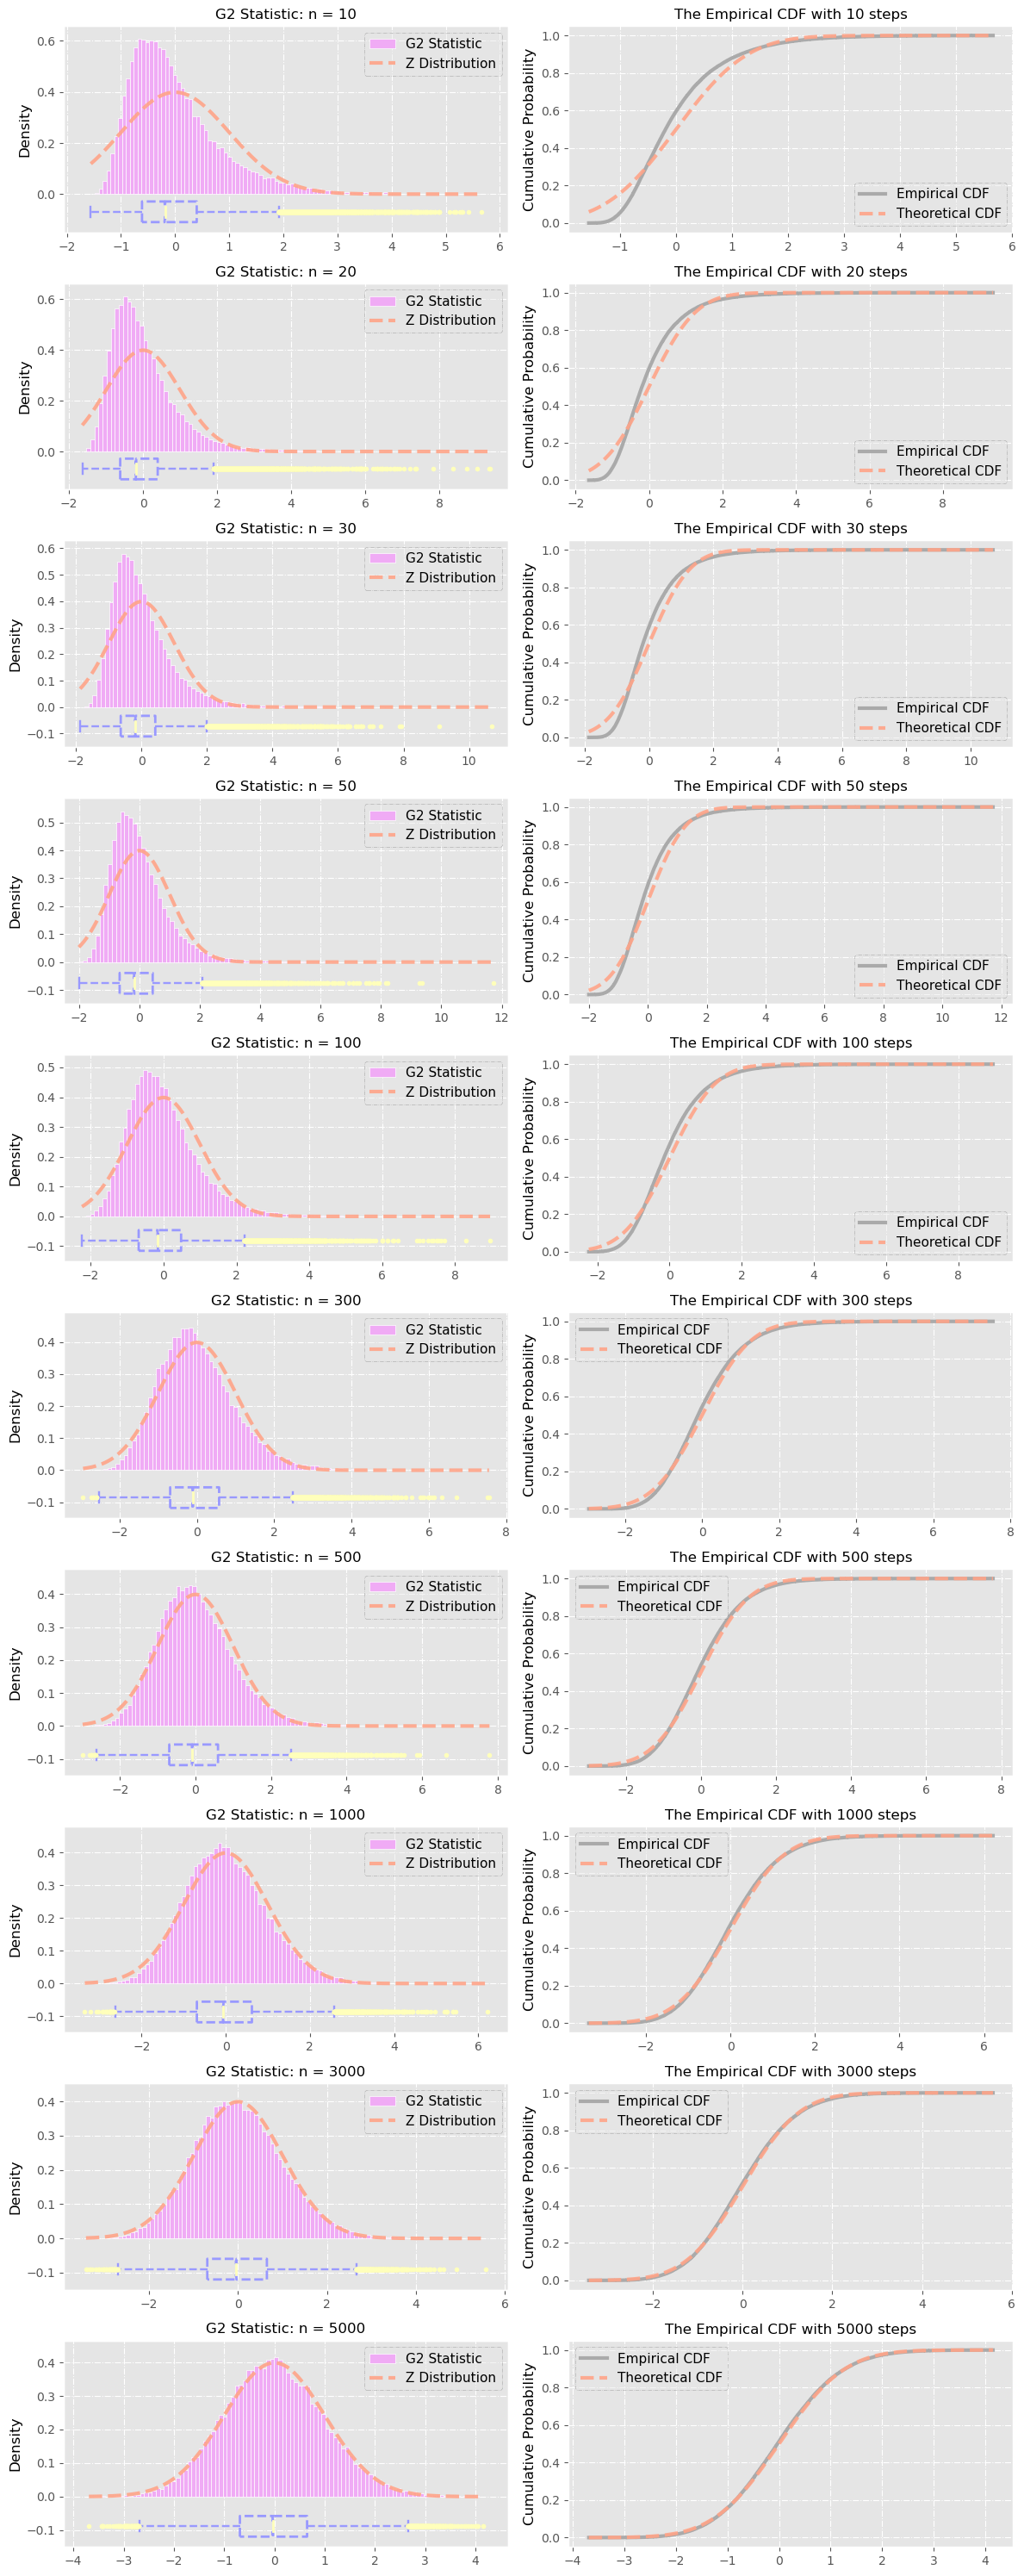

In [309]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import cumfreq, kurtosis
from scipy.stats import norm

# 抽樣次數
N = 50000
# 樣本數
n_val = [10, 20, 30, 50, 100, 300, 500, 1000, 3000, 5000]
G2 = np.zeros((N, len(n_val)))

# 繪圖
plt.style.use('ggplot')
fig, axs = plt.subplots(10, 2, figsize = (12, 30))

for i, n in enumerate(n_val):
    # 生成 N rows n columns 服從標準常態分佈的樣本 for kurtosis
    x = norm.rvs(0, 1, (N, n))
    # 生成 G2 统计量
    # G2 = np.sqrt(n / 24) * (kurtosis(x, axis = 1, bias = False, fisher = False) - 3)
    G2 = np.sqrt(n / 24) * (kurtosis(x, axis = 1, bias = False, fisher = True))

    # normal PDF
    x_pdf = np.linspace(min(G2), max(G2), 1000)
    y_pdf = norm.pdf(x_pdf, 0, 1)

    # 計算 G2 的 ECDF
    res = cumfreq(G2, numbins = N)
    ecdf_x = res.lowerlimit + np.linspace(0, res.binsize * res.cumcount.size, res.cumcount.size)
    cumcountprob = res.cumcount / N  # 累積次數除以總樣本數量 = 累積機率

    # normal CDF
    x_cdf = np.linspace(ecdf_x.min(), ecdf_x.max(), 1000)
    y_cdf = norm.cdf(x_cdf, 0, 1)

    # 設定子圖
    ax_pdf = axs[i, 0]
    ax_cdf = axs[i, 1]

    # G2 统计量的直方图與 normal PDF
    his = ax_pdf.hist(G2, bins = 100, density = True, color = '#F0ABF5', edgecolor = '#FFFFFF'
                , label = 'G2 Statistic')
    ax_pdf.plot(x_pdf, y_pdf, color = '#FFA488', lw = 3, linestyle = '--', label = 'Z Distribution'
                , alpha = 0.9)
    ax_pdf.set_title('G2 Statistic: n = {}'.format(n), fontsize = 12)
    ax_pdf.set_ylabel('Density', fontsize = 12, color = 'black')
    legend0 = ax_pdf.legend(edgecolor = '#666666', prop = {'size': 11})
    legend0.get_frame().set_linestyle('-.')
    legend0.get_frame().set_alpha(0.4)
    ax_pdf.grid(True, linestyle = '-.')
    counts = his[0]
    ax_pdf.set_xlim([x_pdf.min() - 0.5, x_pdf.max() + 0.5])
    ax_pdf.set_ylim(-0.15, counts.max() + 0.05)

    # G2 统计量的盒鬚圖
    boxprops = dict(linestyle = '--', linewidth = 2, color = '#9999FF')
    whiskerprops = dict(color = '#9999FF', linewidth = 1.7, linestyle = '--')
    capprops = dict(color = '#9999FF', linewidth = 1.7)
    flierprops = dict(marker = 'o', markerfacecolor = '#FFFFBB', markersize = 4
                    , linestyle = 'none', markeredgecolor = 'none')   # define outliers
    medianprops = dict(color = '#FFFFBB', linewidth = 2, linestyle = '-')  # 设置中位数线的样式
    ax_box = ax_pdf.twinx()  # 使用 twinx 創建共享 x 軸的第二個 y 軸
    ax_box.boxplot(G2, vert = False, notch = True, boxprops = boxprops, flierprops = flierprops, whiskerprops = whiskerprops
                   , capprops = capprops, medianprops = medianprops, positions = [-0.12], widths = 0.03)
    ax_box.set_yticks([])  # 移除 y 軸刻度
    ax_box.set_ylim(-0.15, 0.15)  # 設置 y 軸範圍以顯示盒鬚圖

    # G2 统计量的 ECDF 與 normal CDF
    ax_cdf.plot(ecdf_x, cumcountprob, drawstyle = 'steps-pre', label = 'Empirical CDF'
                , color = '#AAAAAA', lw = 3)
    ax_cdf.plot(x_cdf, y_cdf, color = '#FFA488', label = 'Theoretical CDF', alpha = 0.9, lw = 3
                , linestyle = '--')
    ax_cdf.set_title('The Empirical CDF with {} steps'.format(n), fontsize = 12)
    ax_cdf.set_ylabel('Cumulative Probability', fontsize = 12, color = 'black')
    legend1 = ax_cdf.legend(edgecolor = '#666666', prop = {'size': 11})
    legend1.get_frame().set_linestyle('-.')
    legend1.get_frame().set_alpha(0.4)
    ax_cdf.grid(True, linestyle = '-.')

plt.tight_layout()
plt.show()

##### **<font color=cornflowerblue>注意事項與討論：</font>**

**<font color=lightseagreen>觀察</font>**：

- 當樣本數 n 較小時，$G_2$ 統計量的分佈與標準常態分佈有較大的偏差。這可能是由於樣本數較小時，估計值的變異較大，導致分佈不穩定。

- 隨著樣本數 n 的增加，$G_2$ 統計量的分佈逐漸趨近於標準常態分佈。當樣本數 n 增加到 3000 或以上時，$G_2$ 統計量的分佈與標準常態分佈非常接近。

- 在樣本數較大的情況下，$G_2$ 統計量的分佈與標準常態分佈非常接近，這表明 $G_2$ 統計量在大樣本的情況下會趨近於標準常態分佈。

- Empirical CDF 與標準常態 CDF 的對比圖顯示，隨著樣本數的增加，Empirical CDF 與標準常態 CDF 越來越接近，這進一步證明了 $G_2$ 統計量在大樣本的情況下會趨近於標準常態分佈。

- 盒鬚圖顯示，隨著樣本數的增加，$G_2$ 統計量的中位數和四分位距逐漸穩定，並且異常值的數量減少；此外，盒鬚圖的形狀顯示資料分佈逐漸對稱，四分位範圍（IQR）變窄，反映出分佈集中度的提升。

**<font color=lightseagreen>結論</font>**：

- 通過蒙地卡羅模擬實驗，我們驗證了以 Kurtosis 為基礎的 $G_2$ 統計量在樣本數較大時，如 n $\geq$ 3000，其分佈會趨近於標準常態分佈 N(0, 1)。

- 當樣本數較小時，估計值的變異較大，導致分佈不穩定。因此，在進行統計檢定時，應考慮樣本數對檢定結果的影響，並盡量使用較大的樣本數以提高檢定的準確性。

<hr>

#### **<font color=indianred>說明</font>**：生成 n 個來自標準常態 N(0, 1) 的隨機樣本，其中樣本數 n = 10，20，30，50，100，300，500，1000，2000。針對每個樣本數 n 進行 N = 50000 次的蒙地卡羅模擬實驗，計算出 $G_3$ 估計值，並繪製出每個樣本數 n 的 $G_3$ 估計值分佈的直方圖以及 Empirical CDF，且分別畫上對應的卡方 $\chi^2(2)$ PDF 與 CDF 圖，觀察由 $G_3$ 統計量生成的估計值與真實卡方分佈 $\chi^2(2)$ 的分佈情況之間的關聯性。

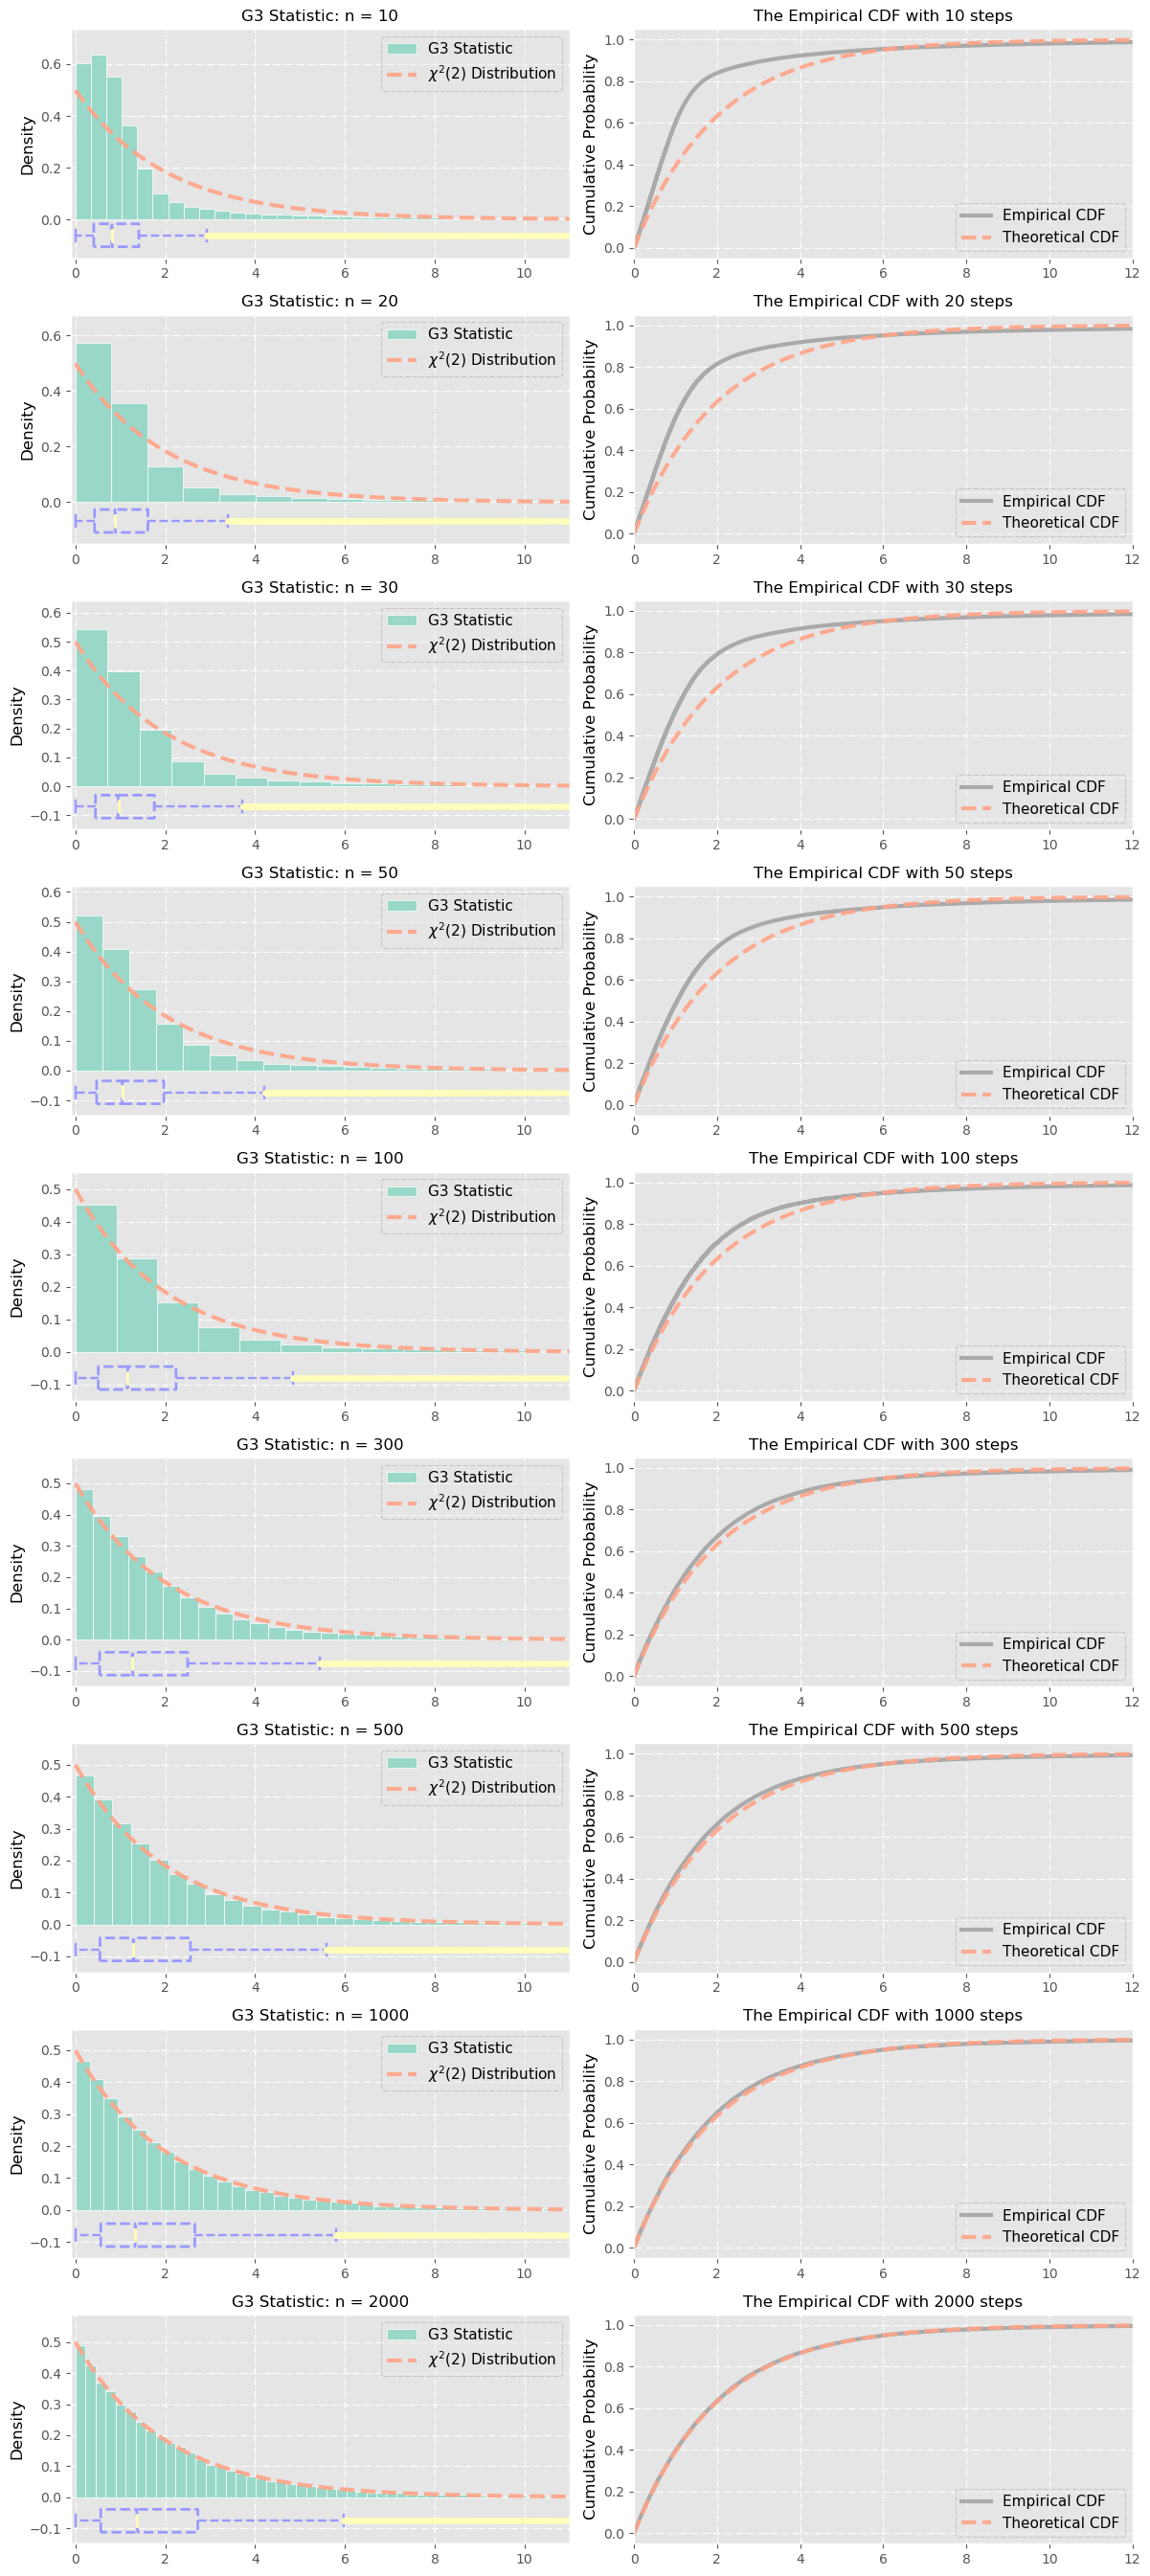

In [311]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import cumfreq, skew, kurtosis
from scipy.stats import norm, chi2

# 抽樣次數
N = 50000
# 樣本數
n_val = [10, 20, 30, 50, 100, 300, 500, 1000, 2000]
G3 = np.zeros((N, len(n_val)))

# 繪圖
plt.style.use('ggplot')
fig, axs = plt.subplots(9, 2, figsize = (12, 27))

for i, n in enumerate(n_val):
    # 生成 N rows n columns 服從標準常態分佈的樣本 for kurtosis
    x = norm.rvs(0, 1, (N, n))
    # 生成 G3 统计量
    s = skew(x, axis = 1, bias = False)
    k = kurtosis(x, axis = 1, bias = False, fisher = True)
    G3 = (n / 6) * ((s ** 2) + ((k ** 2) / 4))

    # chi(2) PDF
    x_pdf = np.linspace(min(G3), max(G3), 1000)
    y_pdf = chi2.pdf(x_pdf, 2)

    # 計算 G3 的 ECDF
    res = cumfreq(G3, numbins = N)
    ecdf_x = res.lowerlimit + np.linspace(0, res.binsize * res.cumcount.size, res.cumcount.size)
    cumcountprob = res.cumcount / N  # 累積次數除以總樣本數量 = 累積機率

    # chi(2) CDF
    x_cdf = np.linspace(ecdf_x.min(), ecdf_x.max(), 1000)
    y_cdf = chi2.cdf(x_cdf, 2)

    # 設定子圖
    ax_pdf = axs[i, 0]
    ax_cdf = axs[i, 1]

    # G3 统计量的直方图與 chi(2) PDF
    his = ax_pdf.hist(G3, bins = 150, density = True, color = '#99d8c9', edgecolor = '#FFFFFF'
                , label = 'G3 Statistic')
    ax_pdf.plot(x_pdf, y_pdf, color = '#FFA488', lw = 3, linestyle = '--', label = '$\chi^2(2)$ Distribution'
                , alpha = 0.9)
    ax_pdf.set_title('G3 Statistic: n = {}'.format(n), fontsize = 12)
    ax_pdf.set_ylabel('Density', fontsize = 12, color = 'black')
    legend0 = ax_pdf.legend(edgecolor = '#666666', prop = {'size': 11})
    legend0.get_frame().set_linestyle('-.')
    legend0.get_frame().set_alpha(0.4)
    ax_pdf.grid(True, linestyle = '-.')
    counts = his[0]
    ax_pdf.set_xlim([-0.1, 11])
    ax_pdf.set_ylim(-0.15, counts.max() + 0.1)

    # G3 统计量的盒鬚圖
    boxprops = dict(linestyle = '--', linewidth = 2, color = '#9999FF')
    whiskerprops = dict(color = '#9999FF', linewidth = 1.7, linestyle = '--')
    capprops = dict(color = '#9999FF', linewidth = 1.7)
    flierprops = dict(marker = 'o', markerfacecolor = '#FFFFBB', markersize = 4
                    , linestyle = 'none', markeredgecolor = 'none')   # define outliers
    medianprops = dict(color = '#FFFFBB', linewidth = 2, linestyle = '-')  # 设置中位数线的样式
    ax_box = ax_pdf.twinx()  # 使用 twinx 創建共享 x 軸的第二個 y 軸
    ax_box.boxplot(G3, vert = False, notch = True, boxprops = boxprops, flierprops = flierprops, whiskerprops = whiskerprops
                   , capprops = capprops, medianprops = medianprops, positions = [-0.12], widths = 0.03)
    ax_box.set_yticks([])  # 移除 y 軸刻度
    ax_box.set_ylim(-0.15, 0.15)  # 設置 y 軸範圍以顯示盒鬚圖

    # G3 统计量的 ECDF 與 chi(2) CDF
    ax_cdf.plot(ecdf_x, cumcountprob, drawstyle = 'steps-pre', label = 'Empirical CDF'
                , color = '#AAAAAA', lw = 3)
    ax_cdf.plot(x_cdf, y_cdf, color = '#FFA488', label = 'Theoretical CDF', alpha = 0.9, lw = 3
                , linestyle = '--')
    ax_cdf.set_xlim([0, 12])
    ax_cdf.set_title('The Empirical CDF with {} steps'.format(n), fontsize = 12)
    ax_cdf.set_ylabel('Cumulative Probability', fontsize = 12, color = 'black')
    legend1 = ax_cdf.legend(edgecolor = '#666666', prop = {'size': 11})
    legend1.get_frame().set_linestyle('-.')
    legend1.get_frame().set_alpha(0.4)
    ax_cdf.grid(True, linestyle = '-.')

plt.tight_layout()
plt.show()

##### **<font color=cornflowerblue>注意事項與討論：</font>**

**<font color=lightseagreen>觀察</font>**：

- 當樣本數 n 較小時，$G_3$ 統計量的分佈與卡方分佈 $\chi^2(2)$ 有較大的偏差。這可能是由於樣本數較小時，估計值的變異較大，導致分佈不穩定。

- 隨著樣本數 n 的增加，$G_3$ 統計量的分佈逐漸趨近於卡方分佈 $\chi^2(2)$。當樣本數 n 增加到 300 或以上時，$G_3$ 統計量的分佈與卡方分佈 $\chi^2(2)$ 幾乎相同。

- 在樣本數較大的情況下，$G_3$ 統計量的分佈與卡方分佈 $\chi^2(2)$ 幾乎完全重合，這表明 $G_3$ 統計量在大樣本的情況下會無限趨近於卡方分佈 $\chi^2(2)$。

- Empirical CDF 與卡方分佈 $\chi^2(2)$ 的對比圖顯示，隨著樣本數的增加，Empirical CDF 與卡方分佈 $\chi^2(2)$ 越來越接近，這進一步證明了 $G_3$ 統計量在大樣本的情況下會無限趨近於卡方分佈 $\chi^2(2)$。

- 盒鬚圖顯示，隨著樣本數 n 的增加，$G_3$ 統計量的中位數和四分位距逐漸被拉長，這表明樣本數增加使得分佈趨勢逐漸變得更加右偏，趨近於卡方分佈 $\chi^2(2)$。

**<font color=lightseagreen>結論</font>**：

- 通過以上實驗，證實了 $G_3$ 確實理論上服從卡方分佈 $\chi^2(2)$，原因是它是由 $G_1^2$ + $G_2^2$ 所形成的，而 $G_1$、$G_2$ 各自服從標準常態 N(0, 1)，故兩者的二次方分佈會變成 $\chi^2(1)$，再相加，分佈最終形成 $\chi^2(2)$。

- 通過蒙地卡羅模擬實驗，我們驗證了由 Skewness 和 Kurtosis 結合形成的 $G_3$ 統計量在樣本數較大時，其分佈趨近於卡方分佈 $\chi^2(2)$。

- 當樣本數較小時，估計值的變異較大，導致分佈不穩定。因此，在進行統計檢定時，應考慮樣本數對檢定結果的影響，並盡量使用較大的樣本數以提高檢定的準確性。

<hr>

### <strong><font color=cornflowerblue>目標二</font></strong>：從不同的母體分配中進行抽樣，並用 $G_3$ 檢定統計量以蒙地卡羅模擬方式來進行檢定，驗證其在來自包含常態分佈下的各種分佈，以及在不同樣本數下檢定力（Power）的表現。

- 假設檢定（$G_3$ 統計量 or Jarque-Bera 檢定）:
$$ H_0: \text{資料來自常態分佈} $$
$$ H_a: \text{資料不來自常態分佈} $$

- 檢定統計量 $G_3$：
$$ G_3 = G_1^2 + G_2^2 = \frac{n}{6}\bigg(\hat{s}^2 + \frac{(\hat{k} - 3)^2}{4}\bigg) $$
其中 $\hat{s}$ 為偏態係數 skewness 的估計值，$\hat{k}$ 為峰態係數 Kurtosis 的估計值。

- Power:
$$P(Reject\; H_0 | Data \sim H_a) = 0.95$$

- Type I Error:
$$P(Reject\; H_0 | Data \sim H_0) = 0.05$$


#### **<font color=indianred>設定</font>**： (1) 計算檢定統計量 $G_3$ 的函數 G3_stats(X)，以及 (2) 快速選擇所需分配的函數 dist(dist_name, N, n)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis, norm, chi2, uniform, t, f

# 1. 計算檢定統計量 G3 的函數 G3_stats(X)
def G3_stats(X):
    """
    Input:
        X: A numpy array of shape (N, n) where N is the number of samples and n is the size of each sample
    Output:
        G3: A numpy array of shape (N,) that contains the G3 statistic for each sample
        P_Val: A numpy array of shape (N,) that contains the p-value for each sample
    """
    n = X.shape[1]
    G1 = np.sqrt(n / 6) * skew(X, axis = 1, bias = False) # bias = False 表示 Unbiased
    G2 = np.sqrt(n / 24) * (kurtosis(X, axis = 1, bias = False, fisher = True))
    G3 = G1**2 + G2**2
    P_Val = 1 - chi2.cdf(G3, df = 2) # chi2.cdf 是指從 0 到 G3 的面積，1 - chi2.cdf 是指從 G3 到無限大的面積
    return G3, P_Val

distributions = {
    'N(0, 1)': lambda size: norm.rvs(loc = 0, scale = 1, size = size),
    'T(3)': lambda size: t.rvs(df = 3, size = size),
    'T(10)': lambda size: t.rvs(df = 10, size = size),
    'T(30)': lambda size: t.rvs(df = 30, size = size),
    'Unif(0, 1)': lambda size: uniform.rvs(loc = 0, scale = 1, size = size),
    '$\chi^2(4)$': lambda size: chi2.rvs(df = 4, size = size),
    '$\chi^2(8)$': lambda size: chi2.rvs(df = 8, size = size),
    '$\chi^2(20)$': lambda size: chi2.rvs(df = 20, size = size),
    'F(10, 10)': lambda size: f.rvs(dfn = 10, dfd = 10, size = size),
    'F(50, 50)': lambda size: f.rvs(dfn = 50, dfd = 50, size = size)
}


# 2. 快速選擇所需分配的函數 dist(dist_name, N, n)
def dist(dist_name, N, n):
    """
    Input:
        dist_name: A string that represents the distribution name
        N: The number of samples
        n: The size of each sample
    Output:
        distributions[dist_name]((N, n)): A numpy array of shape (N, n) that contains the random samples
    """
    return distributions[dist_name]((N, n))

#### **<font color=indianred>說明</font>**：生成 n 個來自 10 種不同參數設定的分佈之隨機樣本，其中樣本數 n = 10，20，30，50，100，300，500，1000；分佈則各別為 N(0, 1)，T(3)，T(30)，Unif(0, 1)，$\chi^2(4)$，$\chi^2(8)$，$\chi^2(20)$，F(10, 10)，F(50, 50)，共 10 種。針對每個樣本數 n 和每種分佈進行 N = 50000 次的蒙地卡羅模擬實驗，計算出 50000 筆 $G_3$ 估計值和 P 值。接著設定 $\alpha = 0.05$（Type I error），將小於 0.05 的 P 值取平均，估計出檢定力 Power，觀察在不同分佈下樣本數對於 Power 的影響。

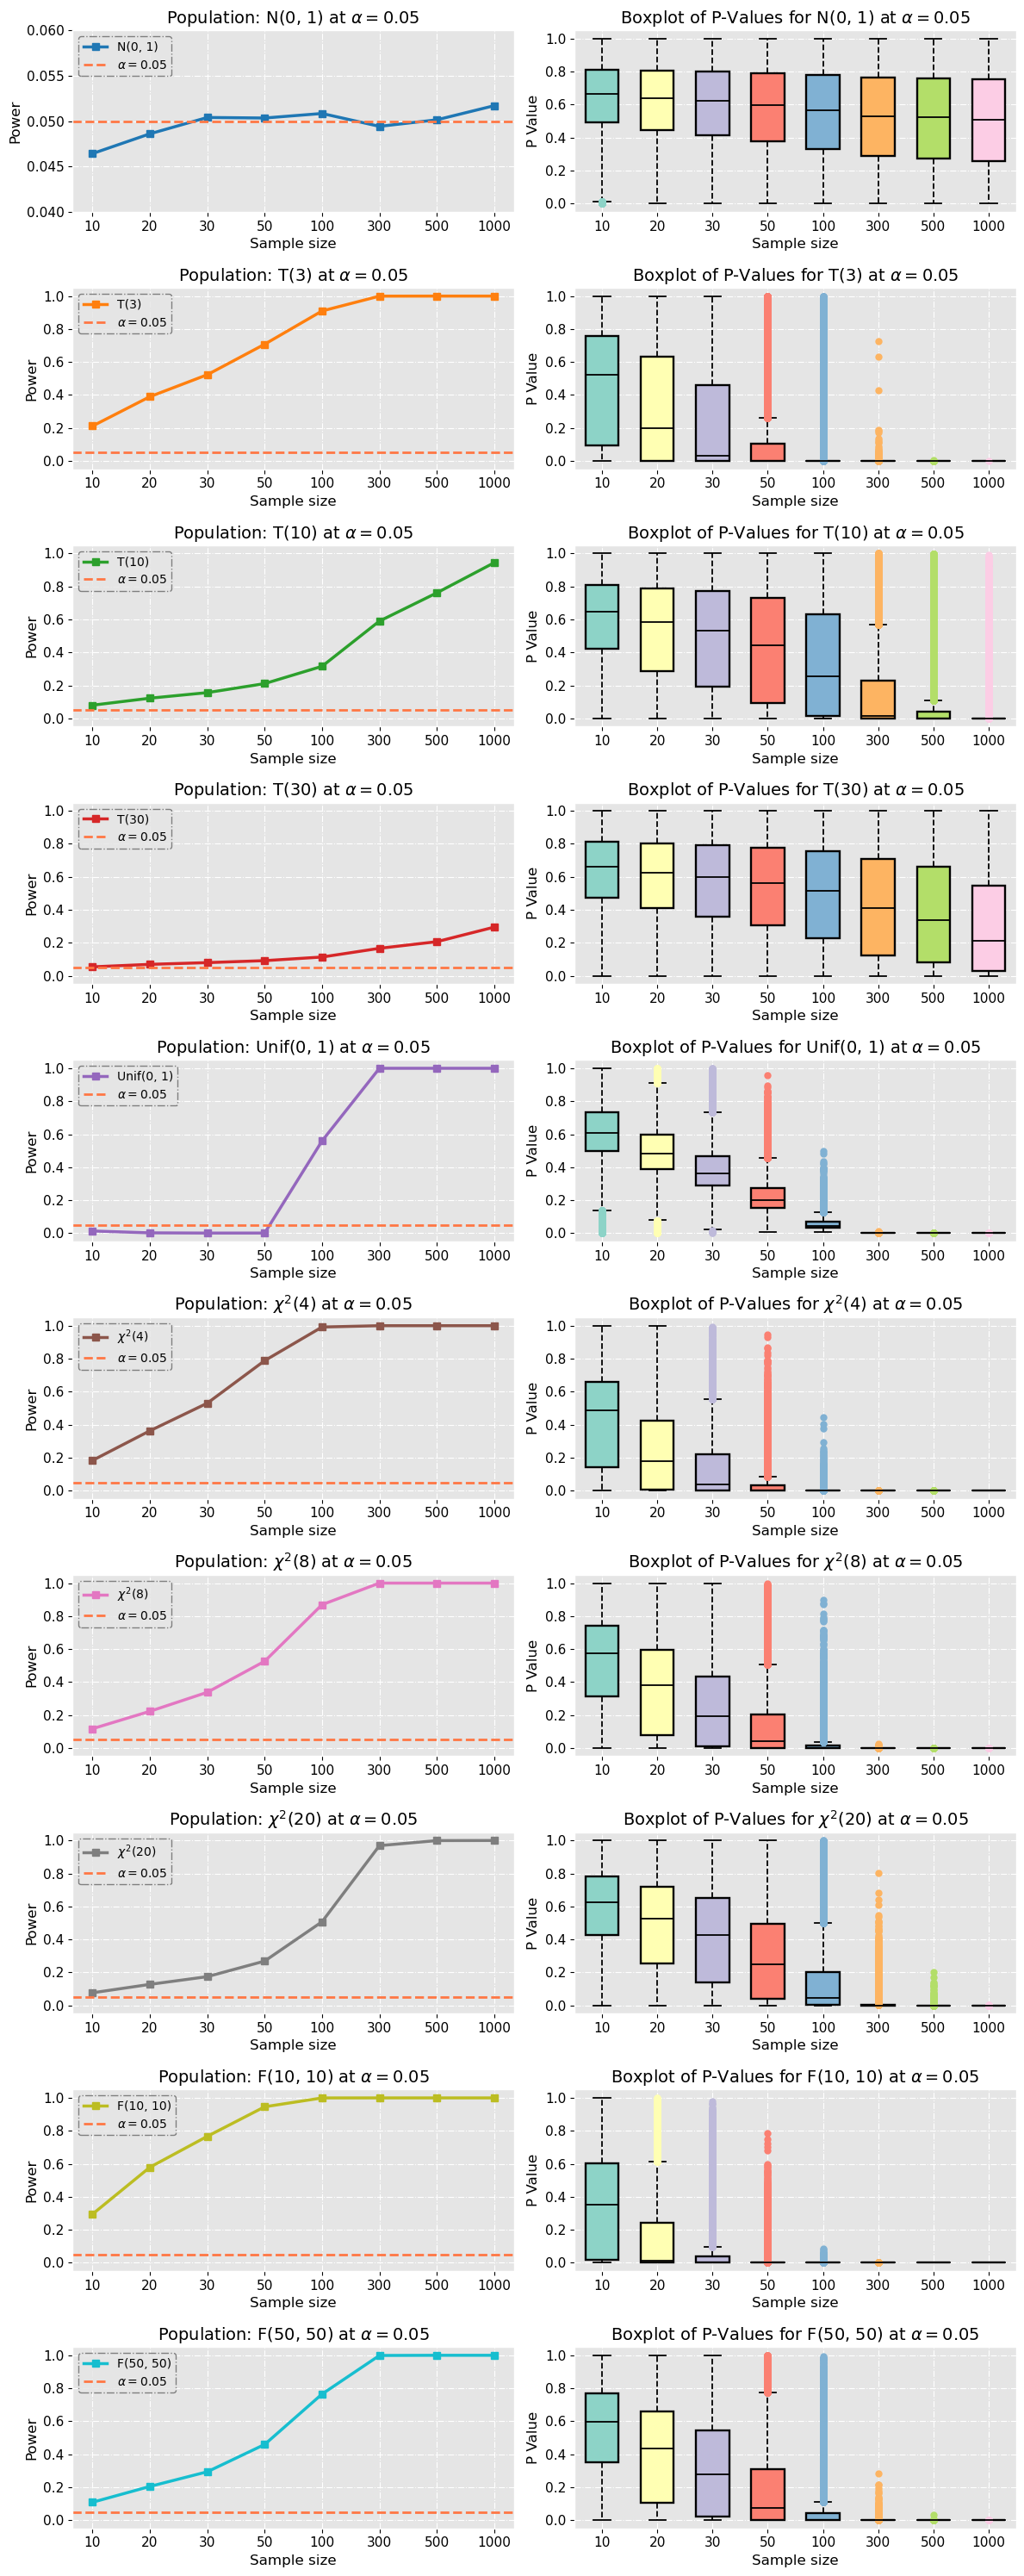

In [33]:
# 設定參數
N = 50000 # number of samples
n = [10, 20, 30, 50, 100, 300, 500, 1000] # sample size
alpha = 0.05

# 繪圖設定
plt.style.use('ggplot')
fig, axs = plt.subplots(10, 2, figsize = (12, 30))
color = sns.color_palette('tab10', 10)
boxcolor = sns.color_palette('Set3', 8)
# color.pop(8)  # 移除第 9 个颜色，因为 F(50, 50) 的颜色太深
ylim_lower = [0.04, 0, 0, 0, -0.05, 0, 0, 0, 0, 0]
ylim_upper = [0.06, 1.15, 1.15, 0.35, 1.15, 1.15, 1.15, 1.15, 1.15, 1.15]

# 開始繪圖
for j, dist_name in enumerate(distributions.keys()):
    # 趨勢圖
    power = np.zeros(len(n))
    p_vals = [[] for _ in range(len(n))]  # 创建一个包含 len(n) 个空列表的列表
    for i in range(len(n)):
        x = dist(dist_name, N, n[i])
        G3, P_Val = G3_stats(x)
        power[i] = np.mean(P_Val < alpha)
        p_vals[i].extend(P_Val)

    axs[j, 0].plot(power, marker = 's', linestyle = '-', color = color[j], lw = 2.5, label = dist_name)
    axs[j, 0].axhline(y = alpha, color = '#FF7744', linestyle = '--', lw = 2
                      , label = '$\\alpha = {}$'.format(alpha))
    axs[j, 0].set_xticks(np.arange(len(n)))
    axs[j, 0].set_xticklabels(n)
    axs[j, 0].set_xlabel('Sample size', fontsize = 12, color = 'black')
    axs[j, 0].set_ylabel('Power', fontsize = 12, color = 'black')
    axs[j, 0].set_title('Population: ' + dist_name + ' at $\\alpha = {}$'.format(alpha), fontsize = 14, color = 'black')
    axs[j, 0].grid(True, linestyle = '-.')
    axs[j, 0].tick_params(axis = 'both', colors = 'black', labelsize = 11)
    legend = axs[j, 0].legend(prop = {'size': 10}, frameon = True, edgecolor = '#666666', loc = 'upper left')
    legend.get_frame().set_linestyle('-.')
    legend.get_frame().set_linewidth(1)
    legend.get_frame().set_alpha(0.8)
    # axs[j, 0].set_ylim([ylim_lower[j], ylim_upper[j]])
    if dist_name == 'N(0, 1)':
        axs[j, 0].set_ylim([0.04, 0.06])
    else:
        axs[j, 0].set_ylim([-0.05, 1.05])

    # 将每个样本大小的 power_val 转换为 numpy 数组
    p_vals = [np.array(pv) for pv in p_vals]
    # 盒鬚圖
    for k in range(len(n)):
        boxprops = dict(linestyle = '-', linewidth = 1.7, color = 'k', facecolor = boxcolor[k])
        whiskerprops = dict(color = 'k', linewidth = 1.3, linestyle = '--')
        capprops = dict(color = 'k', linewidth = 1.3)
        flierprops = dict(marker = 'o', markerfacecolor = boxcolor[k], markersize = 6, linestyle = 'none'
                          , markeredgecolor = 'none')  # define outliers
        medianprops = dict(color = 'k', linewidth = 1.3, linestyle = '-')  # 设置中位数线的样式
        axs[j, 1].boxplot(p_vals[k], vert = True, notch = False, patch_artist = True, boxprops = boxprops
                          , flierprops = flierprops, whiskerprops = whiskerprops,capprops = capprops
                          , medianprops = medianprops, positions = [k], widths = 0.6)  # 使用单一位置值
    axs[j, 1].set_xticks(np.arange(len(n)))
    axs[j, 1].set_xticklabels(n)
    axs[j, 1].set_xlabel('Sample size', fontsize = 12, color = 'black')
    axs[j, 1].set_ylabel('P Value', fontsize = 12, color = 'black')
    axs[j, 1].set_title('Boxplot of P-Values for ' + dist_name + ' at $\\alpha = {}$'.format(alpha), fontsize = 14, color = 'black')
    axs[j, 1].grid(True, linestyle = '-.')
    axs[j, 1].tick_params(axis = 'both', colors = 'black', labelsize = 11)
    

plt.tight_layout()
plt.show()

##### **<font color=cornflowerblue>注意事項與討論：</font>**

**<font color=lightseagreen>觀察</font>**：
- 整體來看，當樣本來自 N(0, 1)時，不論樣本數的多寡，其檢定力 Power 都落在 0.05 附近。除此之外，其他分佈在隨著樣本數 n 的增加，其檢定力 Power 也會隨之增加。

- 其中可見 T(30) 較為特別，雖然和其他不同於常態的分佈一樣，它的 Power 也會隨著樣本數 n 的增加而增加，但是其 Power 增加的幅度並不大，就算樣本數來到了 1000 筆，其 Power 也才大約達到 0.3。

- 其他相同分佈但不同參數，如圖中的卡方分佈、T 分佈以及 F 分佈，可見它們都有共同點，也就是隨著參數越大，其 Power 在相同樣本數 n 下會越低。

- 其中最特別的就是 Unif(0, 1)，其 Power 在小樣本，即 n $\leq$ 50 時，其 Power 都低於 0.05，但當 n > 50 時，其 Power 迅速上升，在 n > 300 後就等於 1。

- 盒鬚圖顯示，當樣本來自 N(0, 1) 時，不論樣本數 n 如何增加，其 P 值的分佈仍均勻分布於 0 到 1 之間，且範圍較廣，相較之下，其他分佈的 P 值在小樣本 n $\leq$ 50 時分佈較分散，但隨著樣本數 n 增加，特別是當 n > 300 時，P 值逐漸趨近於 0，且範圍明顯收窄，特別是如 T(30)、卡方分佈或 F 分佈等，其分佈特性與標準常態相似的分佈，P 值下降的速度明顯較慢。另一方面，Unif(0, 1) 的 P 值在 n > 300 時迅速集中到 0。

**<font color=lightseagreen>結論</font>**：
- 當樣本來自常態分佈時，此時的 Power 又稱為顯著水準，在理論上， Power 應該維持在所設定的型一誤 $\alpha$。本次實驗使用 $G_3$ 統計量檢定來自常態的樣本是否服從常態分佈，其結果與理論的情況相同，其 Power 維持在了 0.05 附近，因為實驗設定了 Type I Error 為 0.05，故會有 5% 的 P 值會錯誤拒絕 $H_0$，故實驗結果符合理論上的結果，證實 $G_3$ 統計量是個不錯的常態檢定方法。

- 接著，從觀察中得知相同分佈在參數越大時，其 Power 隨著樣本數增加而增加的幅度會越低，原因在於無論是卡方分佈、T 分佈、或是 F 分佈在參數很大時，其分佈情況會呈現集中的趨勢，即分佈樣子會長得很像常態，就像 T(30) 一樣，其分佈模樣十分接近標準常態分佈，故當樣本數很小時，檢定統計量很難判斷出該樣本是否為常態，所以當樣本來自這些分佈時，會需要很大的樣本數才能有效的判斷出它不來自於常態。

- 最後，在前面的觀察中得知當樣本來自 Unif(0, 1) 時，其 Power 的表現很特別，其原因在於 Unif(0, 1) 的特性，其資料會在區間 [0, 1] 內呈現均勻分佈，沒有明顯的集中趨勢或偏態。這使得在小樣本數下，資料看起來更像是來自於常態分佈，因為常態分佈的資料在小樣本下也可能顯得均勻，只有在大樣本下其分佈特性才會變得更加明顯，才能判斷出它和常態的差別。

- 總結來說，分佈模樣越像常態，在小樣本下就越難進行判斷，故檢定力 Power 就會越差，只有在大樣本下，檢定的效果才會越好，盒鬚圖的結果也進一步證實了這點，故 $G_3$ 統計量屬於在大樣本下，其檢定力表現才會不錯，故只有樣本很少時，其檢定結果只能作為參考。

<hr>

#### **<font color=indianred>說明</font>**：與前一實驗設定相同，但將 Type I error 設定改為 0.01，將小於 0.01 的 P 值取平均，估計出檢定力 Power，觀察在不同分佈下樣本數對於 Power 的影響。

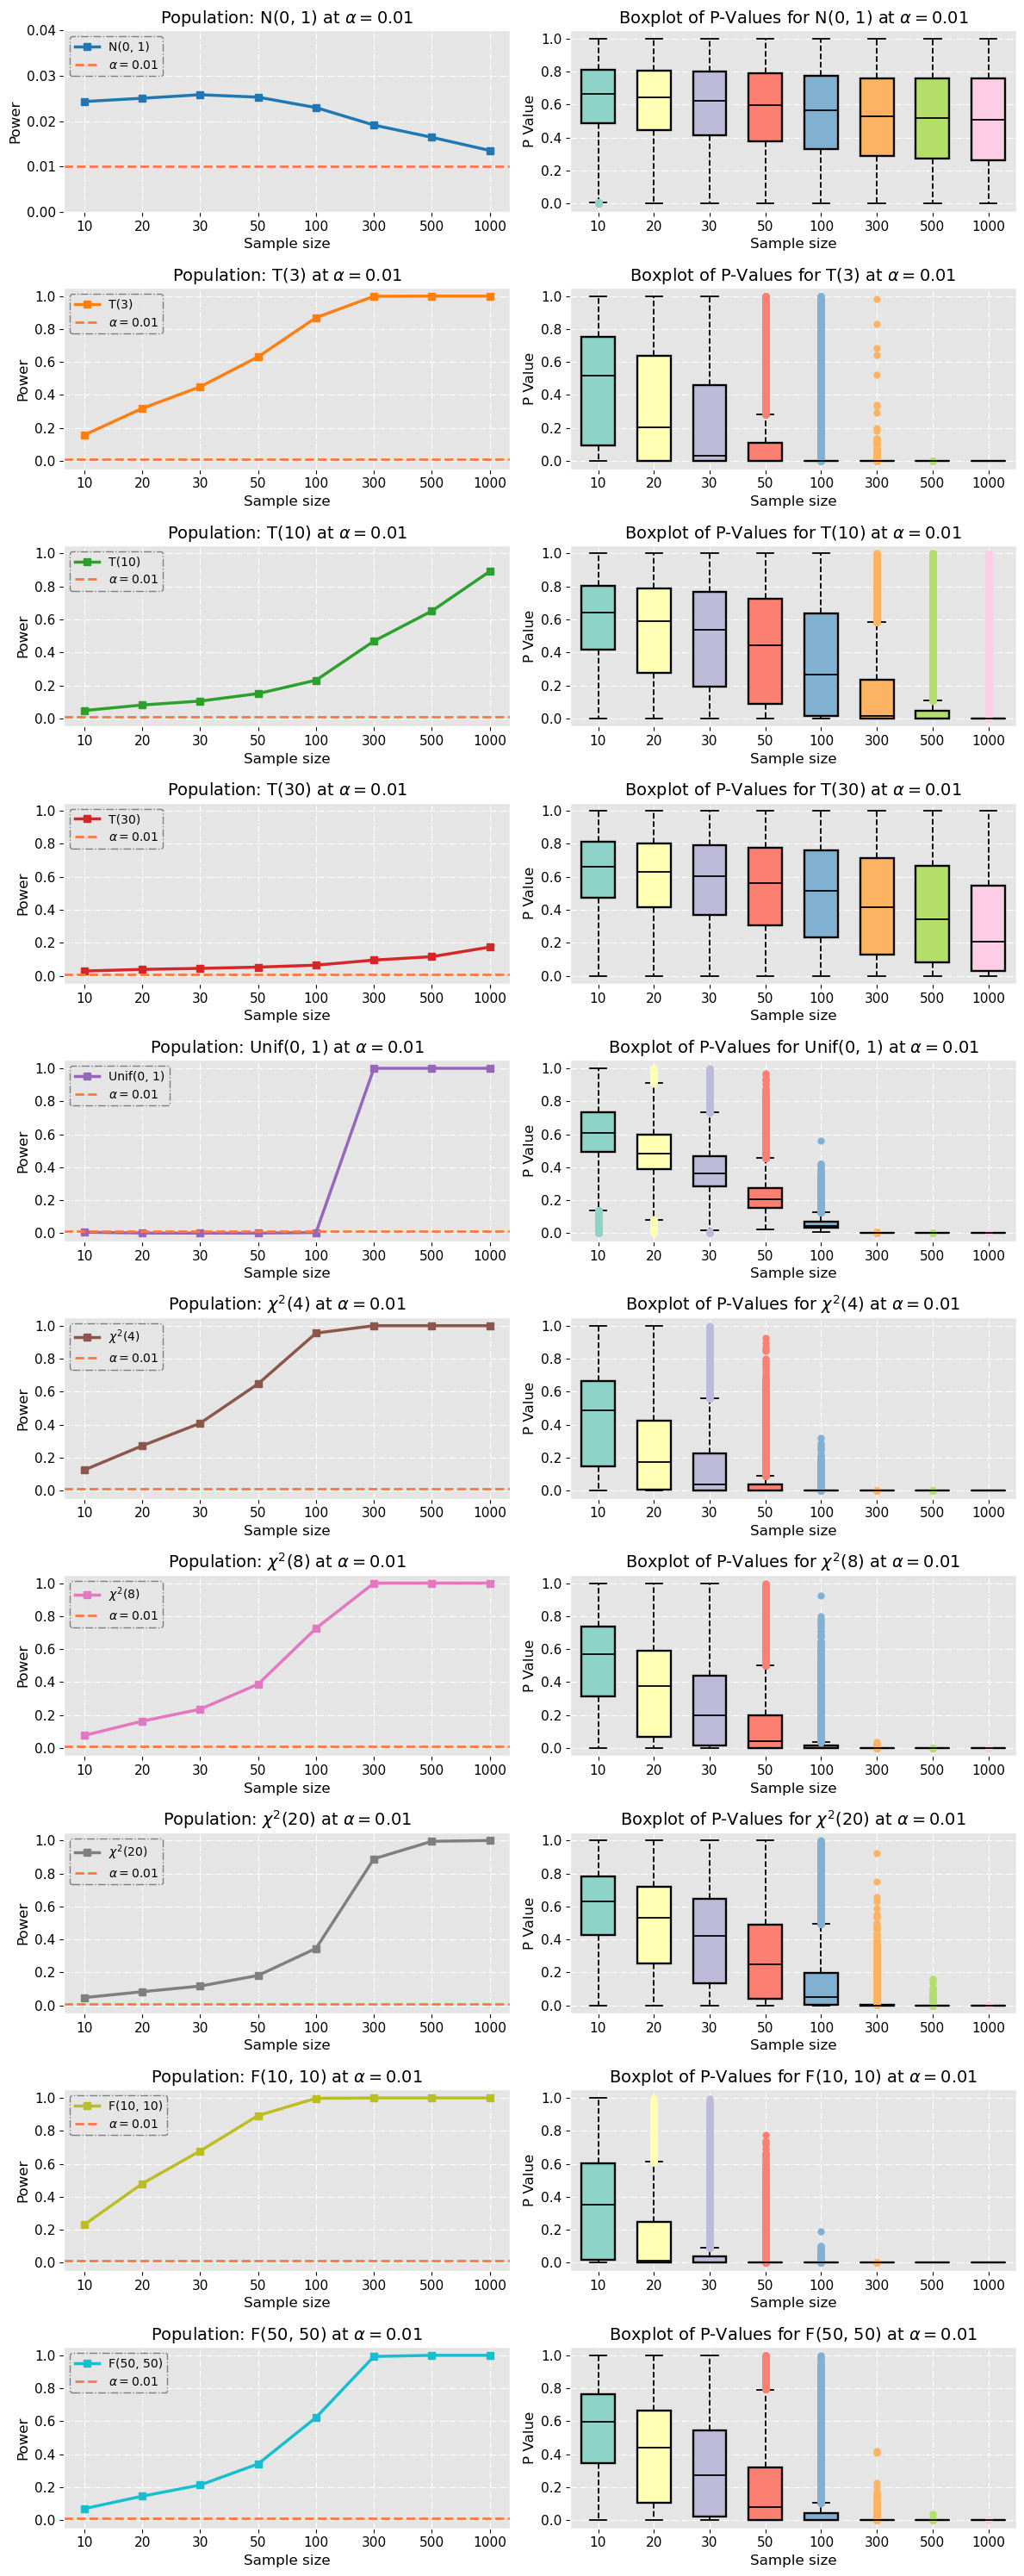

In [36]:
# 設定參數
N = 50000 # number of samples
n = [10, 20, 30, 50, 100, 300, 500, 1000] # sample size
alpha = 0.01

# 繪圖設定
plt.style.use('ggplot')
fig, axs = plt.subplots(10, 2, figsize = (12, 30))
color = sns.color_palette('tab10', 10)
boxcolor = sns.color_palette('Set3', 8)
ylim_lower = [0.04, 0, 0, 0, -0.05, 0, 0, 0, 0, 0]
ylim_upper = [0.06, 1.15, 1.15, 0.35, 1.15, 1.15, 1.15, 1.15, 1.15, 1.15]

# 開始繪圖
for j, dist_name in enumerate(distributions.keys()):
    # 趨勢圖
    power = np.zeros(len(n))
    p_vals = [[] for _ in range(len(n))]  # 创建一个包含 len(n) 个空列表的列表
    for i in range(len(n)):
        x = dist(dist_name, N, n[i])
        G3, P_Val = G3_stats(x)
        power[i] = np.mean(P_Val < alpha)
        p_vals[i].extend(P_Val)

    axs[j, 0].plot(power, marker = 's', linestyle = '-', color = color[j], lw = 2.5, label = dist_name)
    axs[j, 0].axhline(y = alpha, color = '#FF7744', linestyle = '--', lw = 2
                   , label = '$\\alpha = {}$'.format(alpha))
    axs[j, 0].set_xticks(np.arange(len(n)))
    axs[j, 0].set_xticklabels(n)
    axs[j, 0].set_xlabel('Sample size', fontsize = 12, color = 'black')
    axs[j, 0].set_ylabel('Power', fontsize = 12, color = 'black')
    axs[j, 0].set_title('Population: ' + dist_name + ' at $\\alpha = {}$'.format(alpha), fontsize = 14, color = 'black')
    axs[j, 0].grid(True, linestyle = '-.')
    axs[j, 0].tick_params(axis = 'both', colors = 'black', labelsize = 11)
    legend = axs[j, 0].legend(prop = {'size': 10}, frameon = True, edgecolor = '#666666', loc = 'upper left')
    legend.get_frame().set_linestyle('-.')
    legend.get_frame().set_linewidth(1)
    legend.get_frame().set_alpha(0.8)
    # axs[j, 0].set_ylim([ylim_lower[j], ylim_upper[j]])
    if dist_name == 'N(0, 1)':
        axs[j, 0].set_ylim([0, 0.04])
    else:
        axs[j, 0].set_ylim([-0.05, 1.05])

    # 将每个样本大小的 power_val 转换为 numpy 数组
    p_vals = [np.array(pv) for pv in p_vals]
    # 盒鬚圖
    for k in range(len(n)):
        boxprops = dict(linestyle = '-', linewidth = 1.7, color = 'k', facecolor = boxcolor[k])
        whiskerprops = dict(color = 'k', linewidth = 1.3, linestyle = '--')
        capprops = dict(color = 'k', linewidth = 1.3)
        flierprops = dict(marker = 'o', markerfacecolor = boxcolor[k], markersize = 6, linestyle = 'none'
                          , markeredgecolor = 'none')  # define outliers
        medianprops = dict(color = 'k', linewidth = 1.3, linestyle = '-')  # 设置中位数线的样式
        axs[j, 1].boxplot(p_vals[k], vert = True, notch = False, patch_artist = True, boxprops = boxprops
                          , flierprops = flierprops, whiskerprops = whiskerprops,capprops = capprops
                          , medianprops = medianprops, positions = [k], widths = 0.6)  # 使用单一位置值
    axs[j, 1].set_xticks(np.arange(len(n)))
    axs[j, 1].set_xticklabels(n)
    axs[j, 1].set_xlabel('Sample size', fontsize = 12, color = 'black')
    axs[j, 1].set_ylabel('P Value', fontsize = 12, color = 'black')
    axs[j, 1].set_title('Boxplot of P-Values for ' + dist_name + ' at $\\alpha = {}$'.format(alpha), fontsize = 14, color = 'black')
    axs[j, 1].grid(True, linestyle = '-.')
    axs[j, 1].tick_params(axis = 'both', colors = 'black', labelsize = 11)
    
plt.tight_layout()
plt.show()

##### **<font color=cornflowerblue>注意事項與討論：</font>**

**<font color=lightseagreen>觀察</font>**：實驗結果所示，與前一實驗相比，針對每種分佈的檢定結果，其 Power 都比較低，其中較為明顯的例子就是在檢定 N(0, 1)、T(30) 和 Unif(0, 1) 時，其 Power 的表現都比設定 $\alpha = 0.05$ 時來得低。

**<font color=lightseagreen>結論</font>**：與前一實驗相比，設定 $\alpha = 0.01$ 顯然變得更加嚴格，故 Power 的表現如觀察所示都比 $\alpha = 0.05$ 時來得更低，原因在於 P 值要小於 0.01 才能拒絕 $H_0$，表示拒絕 $H_0$ 的門檻變高了，故這時若 Power 還是很高，就表示該樣本所來自的母體分佈確實與常態分佈有很大差異，反之則是與常態分佈的差異不大，故很難去判斷是否拒絕。因此，將 $\alpha$ 值降低是較為保守的做法，好處在於一旦拒絕 $H_0$，表示這是一個比一般設定 $\alpha = 0.05$ 還來得強的檢定，但壞處就是很難做到拒絕 $H_0$，就算檢定的樣本確實不來自 $H_0$，可是一旦分佈情況與常態很相似，那麼它有可能就不會傾向拒絕 $H_0$。

<hr>

### <strong><font color=cornflowerblue>目標三</font></strong>：本目標延續目標二的實驗設定，並加上其他各種著名的常態檢定方法相互進行比較，觀察它們之間在不同樣本數 n 以及不同分佈下檢定力 Power 的表現及差異。

- 假設檢定:
$$ H_0: \text{資料來自常態分佈} $$
$$ H_a: \text{資料不來自常態分佈} $$

- Power:
$$P(Reject\; H_0 | Data \sim H_a) = 0.95$$

- Type I Error:
$$P(Reject\; H_0 | Data \sim H_0) = 0.05$$

- 本目標所使用的常態檢定方法分別來自目標一寫的 $G_3$ Statistic、`scipy.stats` 以及 `statsmodels.stats.diagnostic`:
    - My Jarque–Bera Test ($G_3$ Statistic)
    - scipy Jarque–Bera Test (jarque_bera)
    - scipy D’Agostino and Pearson’s (normaltest)
    - scipy Kolmogorov-Smirnov Test (kstest)
    - scipy Shapiro-Wilk Test (shapiro)
    - scipy Anderson-Darling Test (anderson)
    - scipy Cramér-von Mises Test(cramervonmises)
    - statsmodels Lilliefors Test (lilliefors)

#### **<font color=indianred>設定</font>**： (1) 計算檢定統計量 $G_3$ 的函數 `G3_stats(X)`，以及 (2) 快速選擇所需分配的函數 `dist(dist_name, N, n)`

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis, norm, chi2, uniform, t, f

# 1. 計算檢定統計量 G3 的函數 G3_stats(X)
def G3_stats(X):
    """
    Input:
        X: A numpy array of shape (N, n) where N is the number of samples and n is the size of each sample
    Output:
        G3: A numpy array of shape (N,) that contains the G3 statistic for each sample
        P_Val: A numpy array of shape (N,) that contains the p-value for each sample
    """
    n = X.shape[1]
    G1 = np.sqrt(n / 6) * skew(X, axis = 1, bias = False) # bias = False 表示 Unbiased
    G2 = np.sqrt(n / 24) * (kurtosis(X, axis = 1, bias = False, fisher = True))
    G3 = G1**2 + G2**2
    P_Val = 1 - chi2.cdf(G3, df = 2) # chi2.cdf 是指從 0 到 G3 的面積，1 - chi2.cdf 是指從 G3 到無限大的面積
    return G3, P_Val

distributions = {
    'N(0, 1)': lambda size: norm.rvs(loc = 0, scale = 1, size = size),
    'T(3)': lambda size: t.rvs(df = 3, size = size),
    'T(10)': lambda size: t.rvs(df = 10, size = size),
    'T(30)': lambda size: t.rvs(df = 30, size = size),
    'Unif(0, 1)': lambda size: uniform.rvs(loc = 0, scale = 1, size = size),
    '$\chi^2(4)$': lambda size: chi2.rvs(df = 4, size = size),
    '$\chi^2(8)$': lambda size: chi2.rvs(df = 8, size = size),
    '$\chi^2(20)$': lambda size: chi2.rvs(df = 20, size = size),
    'F(10, 10)': lambda size: f.rvs(dfn = 10, dfd = 10, size = size),
    'F(50, 50)': lambda size: f.rvs(dfn = 50, dfd = 50, size = size)
}


# 2. 快速選擇所需分配的函數 dist(dist_name, N, n)
def dist(dist_name, N, n):
    """
    Input:
        dist_name: A string that represents the distribution name
        N: The number of samples
        n: The size of each sample
    Output:
        distributions[dist_name]((N, n)): A numpy array of shape (N, n) that contains the random samples
    """
    return distributions[dist_name]((N, n))

#### **<font color=indianred>說明</font>**：與目標二的設定相同，生成 n 個來自 10 種不同參數設定的分佈之隨機樣本，其中樣本數 n = 10，20，30，50，100，300，500，1000；分佈則各別為 N(0, 1)，T(3)，T(30)，Unif(0, 1)，$\chi^2(4)$，$\chi^2(8)$，$\chi^2(20)$，F(10, 10)，F(50, 50)。針對每個樣本數 n 和每種分佈進行 N = 50000 次的蒙地卡羅模擬實驗，並使用各種常態檢定方法，計算出 50000 筆估計值或 P 值。接著一樣設定 $\alpha = 0.05$（Type I error），將小於 0.05 的 P 值取平均，估計出檢定力 Power，或是有些檢定方法不提供 P 值，如 Anderson-Darling Test，但有提供估計值和臨界值（Critical Values），因此將大於臨界值的估計值取平均，也可以估計出檢定力 Power，觀察它們之間在不同樣本數 n 以及不同分佈下檢定力 Power 的表現，並對每種檢定方法進行比較。

testing

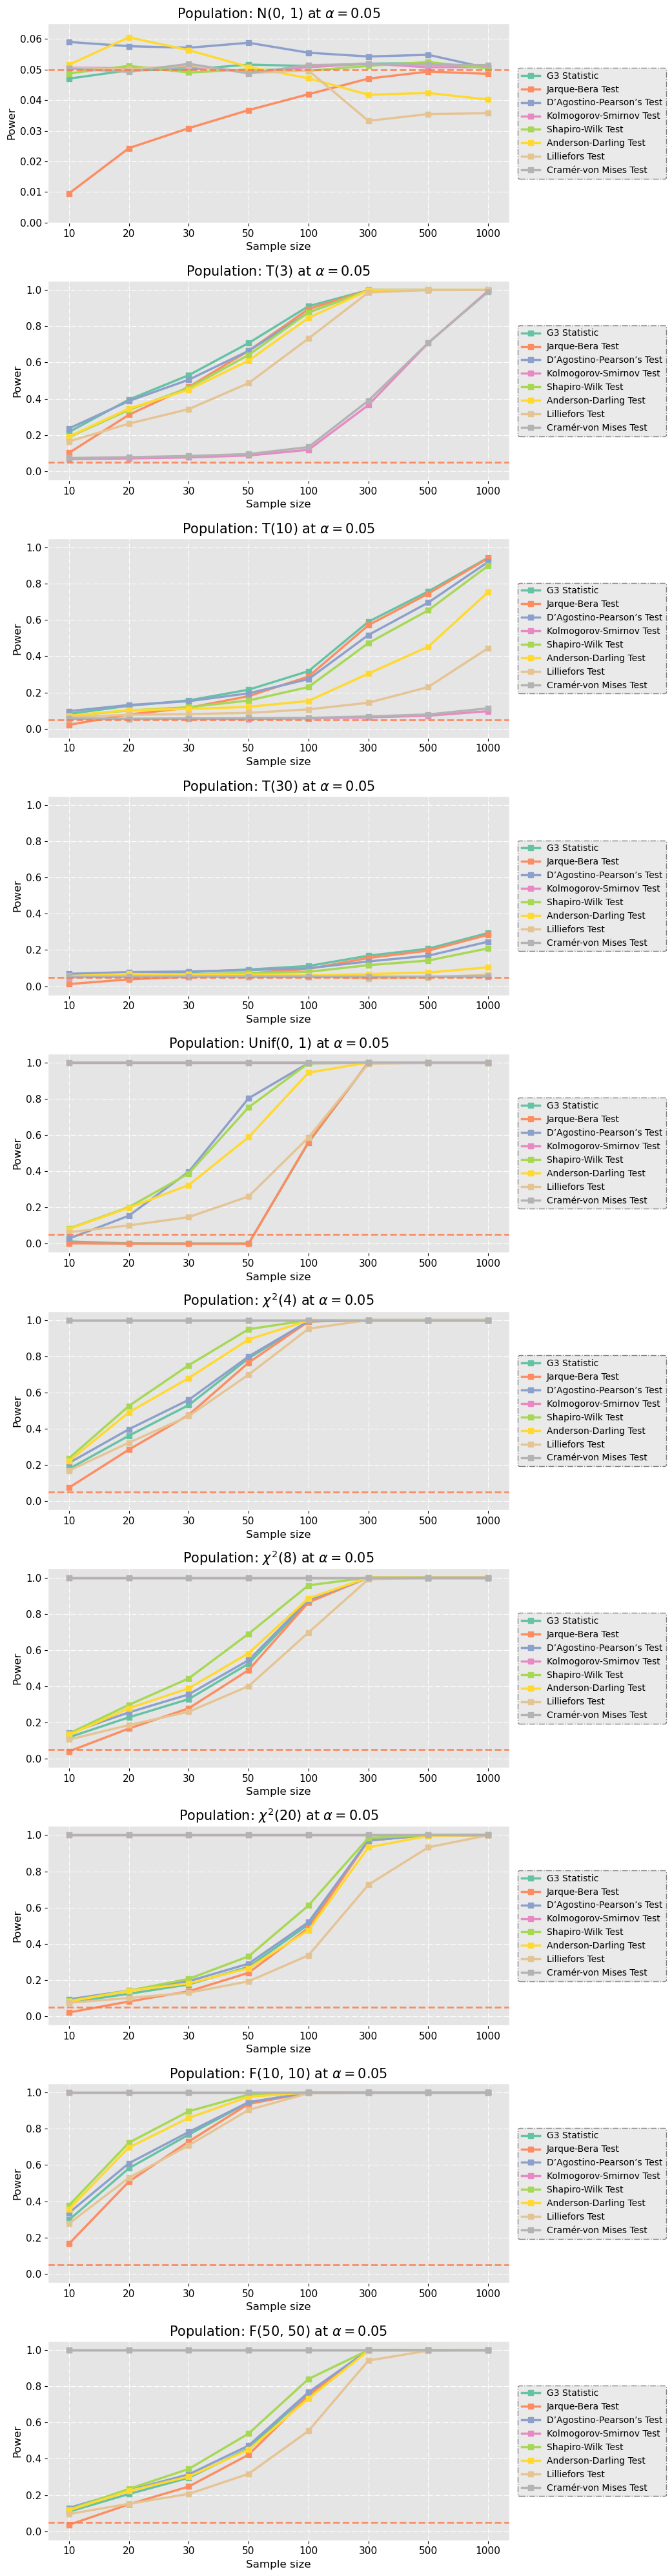

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import jarque_bera, normaltest, kstest, shapiro, anderson, cramervonmises
from statsmodels.stats.diagnostic import lilliefors
import warnings

# 忽略特定警告
warnings.filterwarnings("ignore")

# 設定參數
N = 50000  # number of samples
n = [10, 20, 30, 50, 100, 300, 500, 1000]  # sample size
alpha = 0.05

# 繪圖設定
plt.style.use('ggplot')
fig, axs = plt.subplots(10, 1, figsize = (11, 40))
def distplot(power, color, label):
    axs[k].plot(power, marker = 's', linestyle = '-', color = color, lw = 2.5, label = label)

# 開始繪圖
for k, dist_name in enumerate(distributions.keys()):

    # 初始化 power
    power_jb = np.zeros(len(n))
    power_G3 = np.zeros(len(n))
    power_nt = np.zeros(len(n))
    power_ks = np.zeros(len(n))
    power_sw = np.zeros(len(n))
    power_ad = np.zeros(len(n))
    power_lf = np.zeros(len(n))
    power_cv = np.zeros(len(n))

    # 計算 power for each sample size
    for i in range(len(n)):
        # 選擇分佈
        x = dist(dist_name, N, n[i])

        # 自己的 j-b test
        G3, P_Val = G3_stats(x)
        # scipy j-b test
        p_val_jb = jarque_bera(x, axis = 1)[1]
        # scipy normaltest
        p_val_nt = normaltest(x, axis = 1)[1]
        # scipy kstest
        p_val_ks = kstest(x, 'norm', axis = 1)[1]
        # scipy shapiro test
        p_val_sw = shapiro(x, axis = 1)[1]
        # anderson-darling test
        stat_ad = np.zeros(N)
        critical_val_ad = np.zeros(N)
        for j in range(N):
            result = anderson(x[j], dist = 'norm')
            stat_ad[j] = result.statistic
            critical_val_ad[j] = result.critical_values[2]  # 第三個臨界值，為 5% 顯著性水平
        # lilliefors test
        p_val_lf = np.zeros(N)
        for j in range(N):
            p_val_lf[j] = lilliefors(x[j])[1]
        # cramér-von mises test
        p_val_cv = cramervonmises(x, 'norm', axis = 1).pvalue # 設定為 'norm' 表示比較常態分佈

        # 計算 power
        power_G3[i] = np.mean(P_Val < alpha)
        power_jb[i] = np.mean(p_val_jb < alpha)
        power_nt[i] = np.mean(p_val_nt < alpha)
        power_ks[i] = np.mean(p_val_ks < alpha)
        power_sw[i] = np.mean(p_val_sw < alpha)
        power_ad[i] = np.mean(stat_ad > critical_val_ad)  # 檢驗統計量 > 5% 的臨界值就 reject H0
        power_lf[i] = np.mean(p_val_lf < alpha)
        power_cv[i] = np.mean(p_val_cv < alpha)

    # 繪圖
    axs = axs.ravel()
    power = [power_G3, power_jb, power_nt, power_ks, power_sw, power_ad, power_lf, power_cv]
    color = sns.color_palette('Set2', 8)
    label = ['G3 Statistic', 'Jarque-Bera Test', 'D’Agostino-Pearson’s Test', 'Kolmogorov-Smirnov Test'
                , 'Shapiro-Wilk Test', 'Anderson-Darling Test', 'Lilliefors Test'
                , 'Cramér-von Mises Test']
    # 依序繪製各種檢定的 power
    for c in range(len(power)):
        distplot(power[c], color[c], label[c])
    axs[k].axhline(y = alpha, color = '#FF7744', linestyle = '--', lw = 2, alpha = 0.8)
    axs[k].set_xticks(np.arange(len(n)))
    axs[k].set_xticklabels(n)
    axs[k].set_xlabel('Sample size', fontsize = 12, color = 'black')
    axs[k].set_ylabel('Power', fontsize = 12, color = 'black')
    axs[k].set_title('Population: ' + dist_name + ' at $\\alpha = {}$'.format(alpha)
                     , fontsize = 15, color = 'black')
    axs[k].grid(True, linestyle = '-.')
    axs[k].tick_params(axis = 'both', colors = 'black', labelsize = 11)
    legend = axs[k].legend(prop = {'size': 10}, frameon = True, edgecolor = '#666666'
                          , loc = 'upper right', bbox_to_anchor = (1.35, 0.8))
    legend.get_frame().set_linestyle('-.')
    legend.get_frame().set_linewidth(1)
    legend.get_frame().set_alpha(0.8)
    if dist_name == 'N(0, 1)':
        axs[k].set_ylim([0, 0.065])
    else:
        axs[k].set_ylim([-0.05, 1.05])

plt.tight_layout()
plt.show()
# 跑了 256 m 16.8 s

N(0, 1) 的 anderdon test 在小樣本和老師的表現不同，老師說影響不大，因為這些 test 都是在大樣本才較強，然後 figsize 的部分要寬點，然後scale如果資料不是 N(0,1) ，那麼power的scale就設在0 到 1，因為這樣才能做比較，而來自N(0,1)的power的scale也要拉遠點，這樣才比較清楚看到power的表現，然後要調整圖的話可以在上面生好資料後，在下面調整圖，不用重複進行生資料和畫圖，很浪費時間

##### **<font color=cornflowerblue>注意事項與討論：</font>**

**<font color=lightseagreen>觀察</font>**：
- 與前一實驗不同，通過將各種常態檢定方法進行比較，可以看出每個方法在不同樣本數以及不同分佈下，其 Power 都呈現出不同的表現，但整體上在除了常態分佈以外的其他分佈裡的表現都是隨著樣本數增加，其 Power 也會增加。

- 當樣本來自 N(0, 1) 時，首先可見使用 scipy.jarque_bera 所估計出的 Power 在小樣本時很低，與本實驗所設定的 $G_3$ 統計量有很大的區別，其原因在於本實驗在推估 $G_3$ 統計量時是選擇不偏（Unbiased）估計，但 scipy.jarque_bera 的估計是有偏的（Biased），因此在 Power 的表現上會有區別，但在大樣本下，兩者 Power 的差異不大。此外，根據理論上的 Power，即顯著水準需維持在 0.05，而實驗結果中在大樣本下表現得較不好的檢定方法為 Anderson-Darling Test 與 Lilliefors Test。

- 從 T 分佈來看，與前一實驗的結論相同，隨著參數越大，全部檢定方法的 Power 會越低，特別是在 T(3) 中可見 Kolmogorov-Smirnov Test 與 Cramér-von Mises Test 這兩種方法明顯與其他檢定方法不同，其他方法的 Power 都是隨著樣本數增加而呈現線性增長，但只有它們兩個是直到 n > 100 時 Power 才開始往上升。此外，隨著參數的增加，如在 T(10)、T(30) 明顯可見這兩種方法的 Power 表現是最差的，都落在 0.05 附近，表示它們在 T(10)、T(30) 時無法正確判斷該分佈與 N(0, 1) 的區別。當然，在分佈為 T(30) 以及大樣本下 Power 表現較低的檢定方法還有 Anderson-Darling Test 與 Lilliefors Test。

- 從卡方分佈與 F 分佈來看，與前一實驗的結論相同，兩個分佈一樣隨著參數越大，全部檢定方法的 Power 會越低，其中在大樣本下 Power 較低的檢定方法為 Lilliefors Test。比較有趣的是，從實驗結果中可見有兩種檢定方法不論樣本數多寡，其 Power 始終維持在 1，分別是 Kolmogorov-Smirnov Test 與 Cramér-von Mises Test。

- 從 U(0, 1) 來看，一樣出現了與卡方分佈、F 分佈相同的情況，Kolmogorov-Smirnov Test 與 Cramér-von Mises Test 的 Power 始終維持在 1。此外，$G_3$ 統計量、scipy.jarque_bera 與 Lilliefors Test 在大樣本下的表現相較其他方法來得較差，但在樣本數大於 300 後，所有檢定方法的 Power 都達到了 1。

**<font color=lightseagreen>結論</font>**：
- 當樣本來自 N(0, 1) 時，可見所有的檢定方法在大樣本下都表現得不錯，其 Power 都有維持在 0.05 附近，可是相比下 Lilliefors Test 的表現則稍微差點，且在其他分佈中的表現也很差，但這不能說是這個方法不好，有可能是 statsmodels 裡的 lilliefors 程式並沒有寫好，且相比下其他的方法都來自於 scipy，也表現得較好，故在選擇檢定方法上可能也要考慮其套件來源。

- 從前面的觀察可知，Kolmogorov-Smirnov Test 與 Cramér-von Mises Test 這兩種方法明顯與其他檢定方法不同，在 T 分佈裡這兩種方法在參數越大的情況下，就算是在大樣本下其 Power 都表現得很差，幾乎就是不傾向拒絕，但是在卡方分佈、F 分佈與 Unif(0, 1) 裡這兩種方法卻一開始就呈現了 Power = 1 的情況，這就與它們的假設檢定有關。在本實驗中，與其他方法不同，Anderson-Darling Test、Kolmogorov-Smirnov Test 與 Cramér-von Mises Test 的假設檢定是 “資料是否符合某種特定分佈”，而本實驗將此分佈設定成常態分佈，且後兩者的檢定方式是以分佈整體趨勢去進行判斷，故猜測這是當它們在檢定來自除了常態以外的分佈時，就能馬上判斷出資料不來自常態的原因，而 Anderson-Darling Test 相較於前兩者則是對於分佈尾部較為敏感，故可能這是它不像前兩者那樣可以對於完全不同於常態的分佈這麼敏感的原因。可是，它們在 T 分佈的表現則完全相反，Kolmogorov-Smirnov Test 與 Cramér-von Mises Test 在參數大，且在大樣本下的 Power 也不高，而 Anderson-Darling Test 也只是相對較好，但也與其他檢定方法來得差，這可能是因為 T 分佈在參數越大的情況下，其分佈模樣會越像標準常態，尤其是當 df > 30 時，分佈模樣就幾乎是標準常態了，故這三種方法無法做出正確的判斷。因此，在做常態檢定時，這三種方法無法很好地判斷出 T(df > 30) 和標準常態的區別。

- 總結來說，除了 Anderson-Darling Test、Kolmogorov-Smirnov Test、Cramér-von Mises Test 與 Lilliefors Test 在 T(10)、T(30) 的表現很差以外，整體來說本實驗證實了每種常態檢定方法在大樣本的情況下，對於不來自常態分佈的資料都能達到很高的 Power，表示這些檢定方法都很不錯，但要注意這是需要 “大樣本” 的情況，若是資料屬於小樣本，那以上的檢定方法只能當作參考。

<hr>

#### **<font color=indianred>說明</font>**：與前一實驗設定相同，但將 Type I error 設定改為 0.01，觀察這些常態檢定方法之間在不同樣本數 n 以及不同分佈下檢定力 Power 的表現。

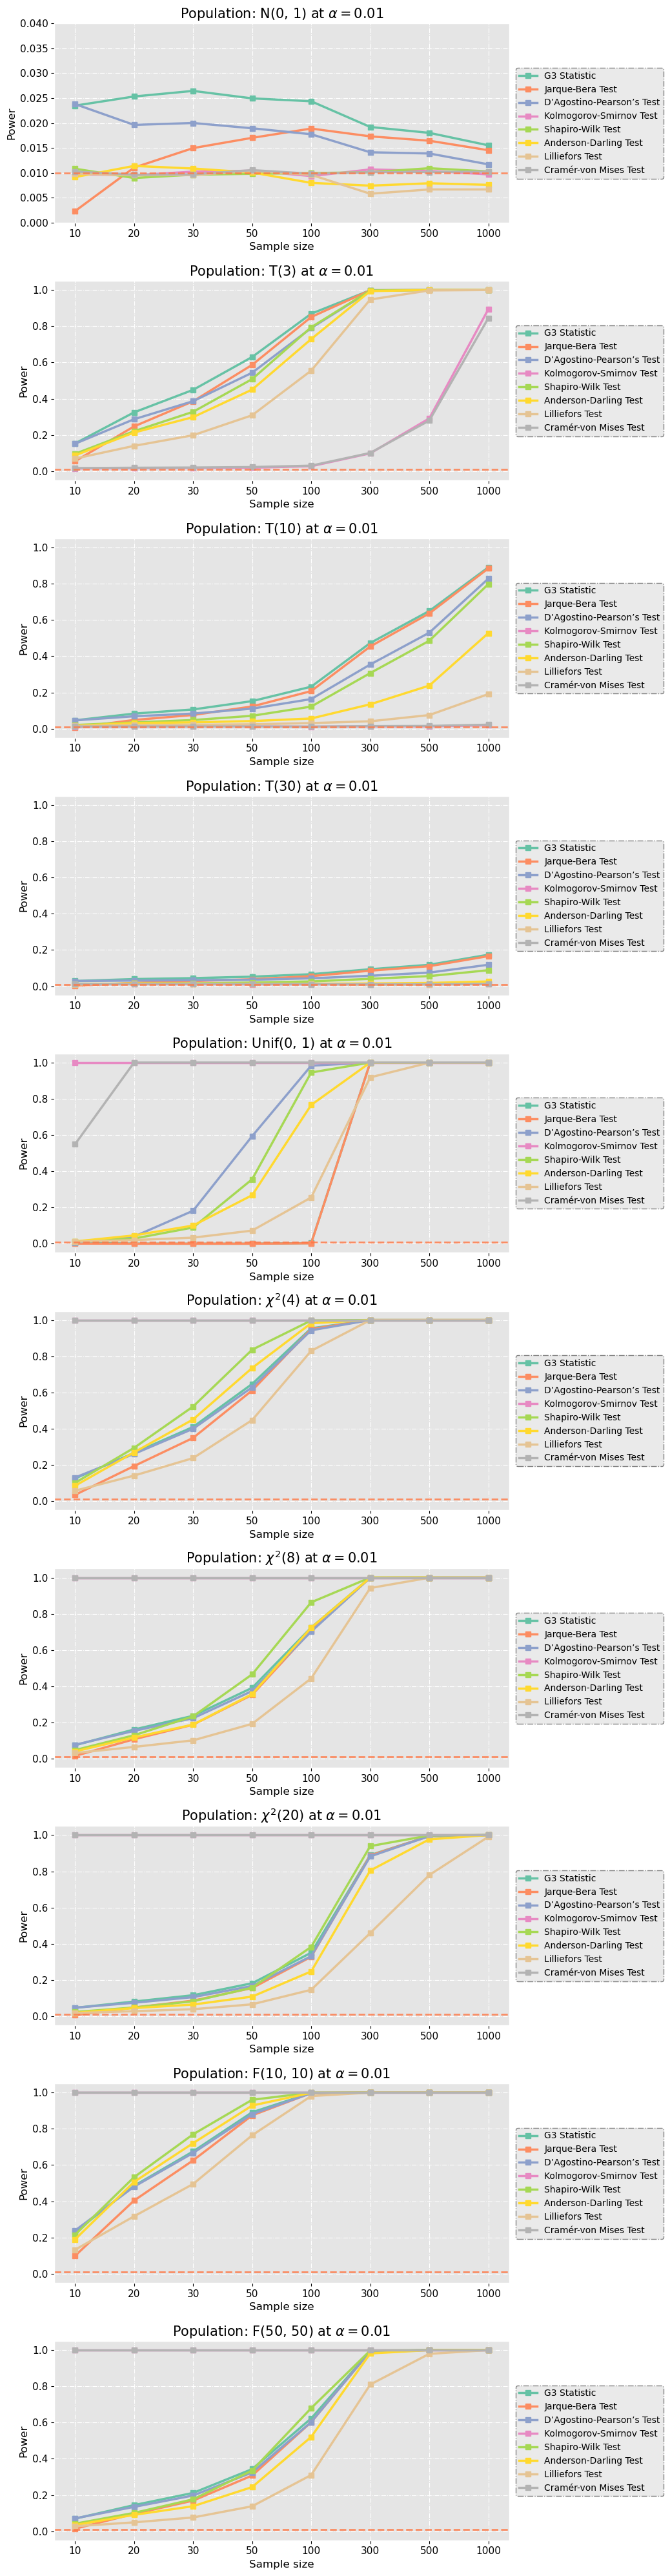

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import jarque_bera, normaltest, kstest, shapiro, anderson, cramervonmises
from statsmodels.stats.diagnostic import lilliefors
import warnings

# 忽略特定警告
warnings.filterwarnings("ignore")

# 設定參數
N = 50000  # number of samples
n = [10, 20, 30, 50, 100, 300, 500, 1000]  # sample size
alpha = 0.01

# 繪圖設定
plt.style.use('ggplot')
fig, axs = plt.subplots(10, 1, figsize = (11, 40))
def distplot(power, color, label):
    axs[k].plot(power, marker = 's', linestyle = '-', color = color, lw = 2.5, label = label)

# 開始繪圖
for k, dist_name in enumerate(distributions.keys()):

    # 初始化 power
    power_jb = np.zeros(len(n))
    power_G3 = np.zeros(len(n))
    power_nt = np.zeros(len(n))
    power_ks = np.zeros(len(n))
    power_sw = np.zeros(len(n))
    power_ad = np.zeros(len(n))
    power_lf = np.zeros(len(n))
    power_cv = np.zeros(len(n))

    # 計算 power for each sample size
    for i in range(len(n)):
        # 選擇分佈
        x = dist(dist_name, N, n[i])

        # 自己的 j-b test
        G3, P_Val = G3_stats(x)
        # scipy j-b test
        p_val_jb = jarque_bera(x, axis = 1)[1]
        # scipy normaltest
        p_val_nt = normaltest(x, axis = 1)[1]
        # scipy kstest
        p_val_ks = kstest(x, 'norm', axis = 1)[1]
        # scipy shapiro test
        p_val_sw = shapiro(x, axis = 1)[1]
        # anderson-darling test
        stat_ad = np.zeros(N)
        critical_val_ad = np.zeros(N)
        for j in range(N):
            result = anderson(x[j], dist = 'norm')
            stat_ad[j] = result.statistic
            critical_val_ad[j] = result.critical_values[4]  # 第 5 個臨界值，為 1% 顯著性水平
        # lilliefors test
        p_val_lf = np.zeros(N)
        for j in range(N):
            p_val_lf[j] = lilliefors(x[j])[1]
        # cramér-von mises test
        p_val_cv = cramervonmises(x, 'norm', axis = 1).pvalue # 設定為 'norm' 表示比較常態分佈

        # 計算 power
        power_G3[i] = np.mean(P_Val < alpha)
        power_jb[i] = np.mean(p_val_jb < alpha)
        power_nt[i] = np.mean(p_val_nt < alpha)
        power_ks[i] = np.mean(p_val_ks < alpha)
        power_sw[i] = np.mean(p_val_sw < alpha)
        power_ad[i] = np.mean(stat_ad > critical_val_ad)  # 檢驗統計量 > 1% 的臨界值就 reject H0
        power_lf[i] = np.mean(p_val_lf < alpha)
        power_cv[i] = np.mean(p_val_cv < alpha)

    # 繪圖
    axs = axs.ravel()
    power = [power_G3, power_jb, power_nt, power_ks, power_sw, power_ad, power_lf, power_cv]
    color = sns.color_palette('Set2', 8)
    label = ['G3 Statistic', 'Jarque-Bera Test', 'D’Agostino-Pearson’s Test', 'Kolmogorov-Smirnov Test'
                , 'Shapiro-Wilk Test', 'Anderson-Darling Test', 'Lilliefors Test'
                , 'Cramér-von Mises Test']
    # 依序繪製各種檢定的 power
    for c in range(len(power)):
        distplot(power[c], color[c], label[c])
    axs[k].axhline(y = alpha, color = '#FF7744', linestyle = '--', lw = 2, alpha = 0.8)
    axs[k].set_xticks(np.arange(len(n)))
    axs[k].set_xticklabels(n)
    axs[k].set_xlabel('Sample size', fontsize = 12, color = 'black')
    axs[k].set_ylabel('Power', fontsize = 12, color = 'black')
    axs[k].set_title('Population: ' + dist_name + ' at $\\alpha = {}$'.format(alpha)
                     , fontsize = 15, color = 'black')
    axs[k].grid(True, linestyle = '-.')
    axs[k].tick_params(axis = 'both', colors = 'black', labelsize = 11)
    legend = axs[k].legend(prop = {'size': 10}, frameon = True, edgecolor = '#666666'
                          , loc = 'upper right', bbox_to_anchor = (1.35, 0.8))
    legend.get_frame().set_linestyle('-.')
    legend.get_frame().set_linewidth(1)
    legend.get_frame().set_alpha(0.8)
    if dist_name == 'N(0, 1)':
        axs[k].set_ylim([0, 0.04])
    else:
        axs[k].set_ylim([-0.05, 1.05])

plt.tight_layout()
plt.show()

# 跑了 268 m 9.5 s

##### **<font color=cornflowerblue>注意事項與討論：</font>**

**<font color=lightseagreen>觀察</font>**：實驗結果所示，與前一實驗相比，針對每種分佈的檢定結果，所有檢定方法的 Power 都較低，其中較為明顯的例子就是在檢定 N(0, 1)、T(30) 和 Unif(0, 1) 時，其 Power 的表現都比設定 $\alpha = 0.05$ 時來得低。

**<font color=lightseagreen>結論</font>**：與目標二裡第二個實驗的結果相同，不管是哪種檢定方法，設定 $\alpha = 0.01$ 顯然變得更加嚴格，故 Power 的表現如觀察所示都比 $\alpha = 0.05$ 時來得更低。可是就算如此，當資料來自的分佈與常態不同時，在大樣本的情況下所有的檢定方法的 Power 都幾乎為 1，因此證實這些檢定方法在檢定資料分佈是否來自常態的效果都很不錯。當然，由於 T(10)、T(30) 與標準常態的分佈很相似，因此正如實驗結果所示，所有檢定方法的 Power 都不高，因此這些檢定方法在大樣本下也不是萬能的，在做檢定時不能單靠一種檢定方法，需要多方檢驗才能夠下結論。

<hr>
<hr>

### <strong><font color=lightseagreen>附錄</font></strong>：

**1. Jarque–Bera Test (`scipy.stats.jarque_bera`)**
- **檢定統計量公式**:
    $$ JB = \frac{n}{6}\bigg(\hat{s}^2 + \frac{(\hat{k} - 3)^2}{4}\bigg) $$
    其中：
    - n = 樣本大小
    - $\hat{s}$ = 偏態係數 (Skewness)
    - $\hat{k}$ = 峰態係數 (Kurtosis)

- **特性**:
  - 檢測資料是否具有常態分佈的偏態與峰態特性。
  - 適用於大樣本。

- **參考來源**:
  - 老師講義: $G^3$ 統計量公式

---

**2. D’Agostino and Pearson’s Test (`scipy.stats.normaltest`)**
- **檢定統計量公式**:
    $$ K^2 = Z_{skew}^2 + Z_{kurtosis}^2 $$
    其中：
    - 偏態檢定統計量: $Z_{skew}$ = $\frac{3(\bar{x} - m)}{\sigma}$, where m = Median
    - 峰態檢定統計量: $Z_{kurtosis}$ = $E[(\frac{X - \mu}{\sigma})^4]$

- **特性**:
  - 結合偏態與峰態，統合檢測資料的常態性。
  - 適用於中到大樣本資料。

- **參考來源**:
  - $K^2$ 公式: https://www.geeksforgeeks.org/scipy-stats-normaltest-function-python/
  - $Z_{skew}^2、Z_{kurtosis}^2$ 來源: https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.normaltest.html
  - $Z_{skew}$ 公式: https://www.geeksforgeeks.org/scipy-stats-skewtest-function-python/
  - $Z_{kurtosis}$ 公式: https://www.geeksforgeeks.org/scipy-stats-kurtosistest-function-python/

---

**3. Kolmogorov-Smirnov Test (`scipy.stats.kstest`)**
- **檢定統計量公式**:
    $$ D_n = \sup_x |F_n(x) - F(x)| $$
    其中：
    - $F_n(x)$ = 經驗累積分佈函數 (Empirical CDF)
    - $F(x)$ = 理論累積分佈函數 (分佈 CDF)

- **特性**:
  - 檢測資料與指定分佈的吻合程度。
  - 對於樣本大小敏感。

- **參考來源**:
  - 檢定統計量公式來源 1: https://www.geeksforgeeks.org/kolmogorov-smirnov-test-ks-test/
  - 檢定統計量公式來源 2: 無母數課程講義

---

**4. Shapiro-Wilk Test (`scipy.stats.shapiro`)**
- **檢定統計量公式**:
    $$ W = \frac{\left( \sum_{i=1}^n a_i x_{(i)} \right)^2}{\sum_{i=1}^n (x_i - \bar{x})^2} $$
    其中：
    - $a_i$ = 預先計算的權重
    - $x_{(i)}$ = 排序後的樣本值
    - $\bar{x}$ = 樣本平均

- **特性**:
  - 檢測資料是否來自常態分佈。
  - 適用於小到中等樣本資料。

- **參考來源**:
  - 檢定統計量公式來源: https://www.itl.nist.gov/div898/handbook/prc/section2/prc213.htm

---

**5. Anderson-Darling Test (`scipy.stats.anderson`)**
- **檢定統計量公式**:
    $$ A^2 = -n - \frac{1}{n} \sum_{i=1}^n \{ (2i - 1) \left[ \ln(F(x_i)) + \ln(1 - F(x_{n+1-i})) \right] \} $$
    其中：
    - n = 樣本大小
    - $x_i$ = 排序後的樣本值
    - $F(x_i)$ = 理論累積分佈函數 (分佈 CDF)

- **特性**:
  - 專注於分佈尾部的偏差。
  - 可針對多種分佈檢測（不僅限於常態分佈）。

- **參考來源**:
  - 檢定統計量公式來源 1: https://www.6sigma.us/six-sigma-in-focus/anderson-darling-normality-test/
  - 檢定統計量公式來源 2: https://www.itl.nist.gov/div898/handbook/eda/section3/eda35e.htm

---

**6. Cramér-von Mises Test (`scipy.stats.cramervonmises`)**
- **檢定統計量公式**:
    $$ T = \frac{1}{12n} + \sum_{i=1}^n \left( F(x_i) - \frac{2i - 1}{2n} \right)^2 $$
    其中：
    - n = 樣本大小
    - $F(x_i)$ = 理論累積分佈函數 (分佈 CDF)

- **特性**:
  - 檢測分佈與理論分佈的一致性。
  - 平均分佈誤差敏感。

- **參考來源**:
  - 檢定統計量公式來源 1: https://en.wikipedia.org/wiki/Cram%C3%A9r%E2%80%93von_Mises_criterion
    - 說明: scipy 官網裡 https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.cramervonmises.html 記載 `scipy.stats.cramervonmises` 的 References 裡有引用上面維基百科的內容，故判斷具有可信度。
  - 檢定統計量公式來源 2: https://influentialpoints.com/Training/cramer_von_mises_test.htm

---

**7. Lilliefors Test (`statsmodels.stats.diagnostic.lilliefors`)**
- **檢定統計量公式**:
    
    Based on Kolmogorov-Smirnov Test：
    $$ D = \sup_x |F_n(x) - \hat{F_0}(x)| $$
    其中：
    - $F_n(x)$ = 經驗累積分佈函數 (Empirical CDF)
    - $\hat{F_0}(x)$ = 由樣本均值與標準差估計出的 Z 分佈之累積分佈函數 (CDF of Z Distribution)

- **特性**:
  - 修正 Kolmogorov-Smirnov Test，允許分佈參數未知。
  - 適用於常態分佈檢測。

- **參考來源**:
  - 檢定統計量公式來源 1: 無母數課程講義
  - 檢定統計量公式來源 2: https://www.statisticshowto.com/lilliefors-test/

---